## ĐỒ ÁN CUỐI KỲ - CSC17104: LẬP TRÌNH KHOA HỌC DỮ LIỆU
### TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐHQG-HCM
#### Khoa Công nghệ Thông tin

**Tên đề tài:** Phân tích Xu hướng Âm nhạc Toàn cầu trên Spotify (2009-2025)  
**Bộ dữ liệu:** Spotify Global Music Dataset 2009-2025

**Danh sách thành viên nhóm:**
1. 23120038 - Lê Hoàng Mỹ Hạ
2. 23120084 - Nguyễn Mạnh Thắng 
---

## 1. Thu thập dữ liệu (Data Collection)

### Tổng quan về bộ dữ liệu
* **Chủ đề:** Dữ liệu này mang đến những góc nhìn về cách xu hướng âm nhạc, mức độ phổ biến của nghệ sĩ và các thể loại đã thay đổi theo thời gian, bao gồm cả những ca khúc đương đại năm 2025 và những bản hit vượt thời gian giai đoạn 2009–2023.
* **Ngữ cảnh thực tế:** Dữ liệu đại diện cho hành vi tiêu thụ âm nhạc toàn cầu và đặc điểm âm nhạc của các bài hát thịnh hành trong hơn 15 năm qua.

### Nguồn gốc
* **Nền tảng:** Kaggle
* **URL:** [https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025](https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025)
* **Tác giả:** Warda Bilal

### Giấy phép & Sử dụng
* **Giấy phép:** CCO [[text](https://creativecommons.org/publicdomain/zero/1.0/)]
* **Quyền sử dụng:** Được phép sử dụng cho mục đích giáo dục trong môn học này.

### Thu thập dữ liệu
* **Phương pháp thu thập:** Dữ liệu được thu thập thông qua Spotify Web API công khai, bằng các truy vấn lập trình để lấy thông tin về bài hát, nghệ sĩ, album và đặc trưng âm thanh.
* **Đối tượng và cách lấy mẫu:** Đối tượng là các bài hát và nghệ sĩ trên nền tảng Spotify toàn cầu.
Dữ liệu được chọn lọc không ngẫu nhiên, tập trung vào các bài hát phổ biến, đại diện cho xu hướng âm nhạc giai đoạn 2009–2025.

* **Thời gian:** 
    * Thời gian phát hành nhạc: 2009–2025
    * Dữ liệu được trích xuất tại thời điểm tạo bộ dữ liệu (sau năm 2023).

* **Hạn chế và thiên lệch:**
    * Thiên lệch về độ phổ biến (ưu tiên các bài hát nổi tiếng)
    * Chỉ phản ánh xu hướng trên Spotify, không đại diện toàn bộ thị trường âm nhạc
    * Một số chỉ số có thể thay đổi theo thời gian do giới hạn của API

### Lý do chọn đề tài
* Âm nhạc là chủ đề phổ biến và dễ tiếp cận.
* Bộ dữ liệu có sự kết hợp tốt giữa dữ liệu số và dữ liệu phân loại (nghệ sĩ, thể loại).

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
import warnings
import ast
import os

# sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Tải data
try:
    df = pd.read_csv('spotify_data_clean.csv')
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Không tìm thấy file.")

Đã tải dữ liệu thành công!


## 2. Data Exploration

### 2.1 Tổng quan về Bộ dữ liệu

#### 1. Thông tin cơ bản 

 - Số dòng, số cột

In [3]:
# Tính số dòng, số cột, 5 dòng đầu tiên
nrows,ncolumns = df.shape
print(f"Số dòng: {nrows}, Số cột: {ncolumns}")
df.head()

Số dòng: 8582, Số cột: 15


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


 - Mỗi dòng đại diện cho điều gì?  
→ Mỗi dòng tương ứng với một bài hát cụ thể (được định danh bằng track_id).

 - Kích thước dữ liệu:

In [4]:
# Tính kích thước dữ liệu
file_path="spotify_data_clean.csv"
size_bytes=os.path.getsize(file_path)
size_kb= size_bytes/(1024)
print(f"Kích thước dữ liệu: {size_kb:.2f} KB")

Kích thước dữ liệu: 1377.51 KB


#### 2. Tính toàn vẹn dữ liệu

 * Có dòng dữ liệu nào bị trùng lặp không? Nếu có, có bao nhiêu dòng?

In [5]:
# Tính số dòng trùng lặp
dup_count=df.duplicated().sum()
print(f"Số dòng trùng: {dup_count}")

Số dòng trùng: 0


* Tất cả các dòng dữ liệu có đầy đủ thông tin không, hay có dòng nào bị trống hoàn toàn?

In [6]:
# Đếm số dòng trống
df = df.replace(r'^\s*$', pd.NA, regex=True)
empty_rows = df.isna().all(axis=1).sum()
print(f"Số dòng trống: {empty_rows}")

Số dòng trống: 0


#### 3. Danh mục cột dữ liệu

 * Ý nghĩa/định nghĩa của từng cột là gì?

| Trường dữ liệu | Ý nghĩa |
|--------------|--------|
| `track_id` | Mã định danh duy nhất của bài hát trên Spotify |
| `track_name` | Tên bài hát |
| `track_number` | Thứ tự của bài hát trong album |
| `track_popularity` | Mức độ phổ biến của bài hát trên Spotify (0–100) |
| `explicit` | Cho biết bài hát có nội dung nhạy cảm hay không |
| `artist_name` | Tên nghệ sĩ chính |
| `artist_popularity` | Mức độ phổ biến của nghệ sĩ trên Spotify (0–100) |
| `artist_followers` | Số lượng người theo dõi nghệ sĩ |
| `artist_genres` | Các thể loại âm nhạc của nghệ sĩ |
| `album_id` | Mã định danh của album |
| `album_name` | Tên album |
| `album_release_date` | Ngày phát hành album |
| `album_total_tracks` | Tổng số bài hát trong album |
| `album_type` | Loại album (album / single / compilation) |
| `track_duration_min` | Thời lượng bài hát (tính bằng phút) |


 * Những cột nào phù hợp và hữu ích cho việc phân tích?  
   
   
    - `track_popularity`: Biến mục tiêu hoặc biến so sánh mức độ thành công của bài hát
    - `explicit`: Phân tích ảnh hưởng của nội dung nhạy cảm đến độ phổ biến
    - `artist_popularity`: So sánh mức độ nổi tiếng của nghệ sĩ
    - `artist_followers`: Phân tích mối quan hệ giữa lượng fan và độ phổ biến bài hát
    - `artist_genres`: Phân tích theo thể loại, xu hướng âm nhạc
    - `album_release_date`: Phân tích theo thời gian (năm phát hành, xu hướng qua các giai đoạn)
    - `album_total_tracks`: So sánh cấu trúc album và mức độ thành công
    - `album_type`: So sánh hiệu suất giữa album, single, compilation
    - `track_duration_min`: Phân tích độ dài bài hát theo thể loại hoặc độ phổ biến
    - `track_number`: Phân tích vị trí bài hát trong album (opening track vs. later tracks)

 * Có cột nào nên được loại bỏ không? Vì sao?  
   

    - `track_id`: Chỉ dùng để định danh, không mang ý nghĩa phân tích
    - `album_id`: Mã định danh album, không mang thông tin phân tích
    - `album_name`: Tên album
    - `track_name`: Dữ liệu dạng văn bản, chỉ dùng để hiển thị
    - `artist_name`: Tên riêng, không dùng trực tiếp cho mô hình

#### 4. Kiểu dữ liệu (Data Types)

 * Kiểu dữ liệu hiện tại của từng cột là gì?

In [7]:
# Lấy kiểu dữ liệu
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

 * Có cột nào đang dùng kiểu dữ liệu không phù hợp không?  
 → Cột `album_release_date` với kiểu dữ liệu object

 * Những cột nào cần được chuyển đổi kiểu dữ liệu?  
 → `album_release_date` về datetime

In [8]:
# Chuyển đổi kiểu dữ liệu cột album_release_date
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['album_release_date'].dtypes

dtype('<M8[ns]')

### 2.2 Phân tích biến số số (numerical)  

#### 1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

 * Hình dáng dữ liệu 
 * Trực quan hóa dữ liệu

In [9]:
# Lấy các cột số
num_cols = ['track_number','track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']

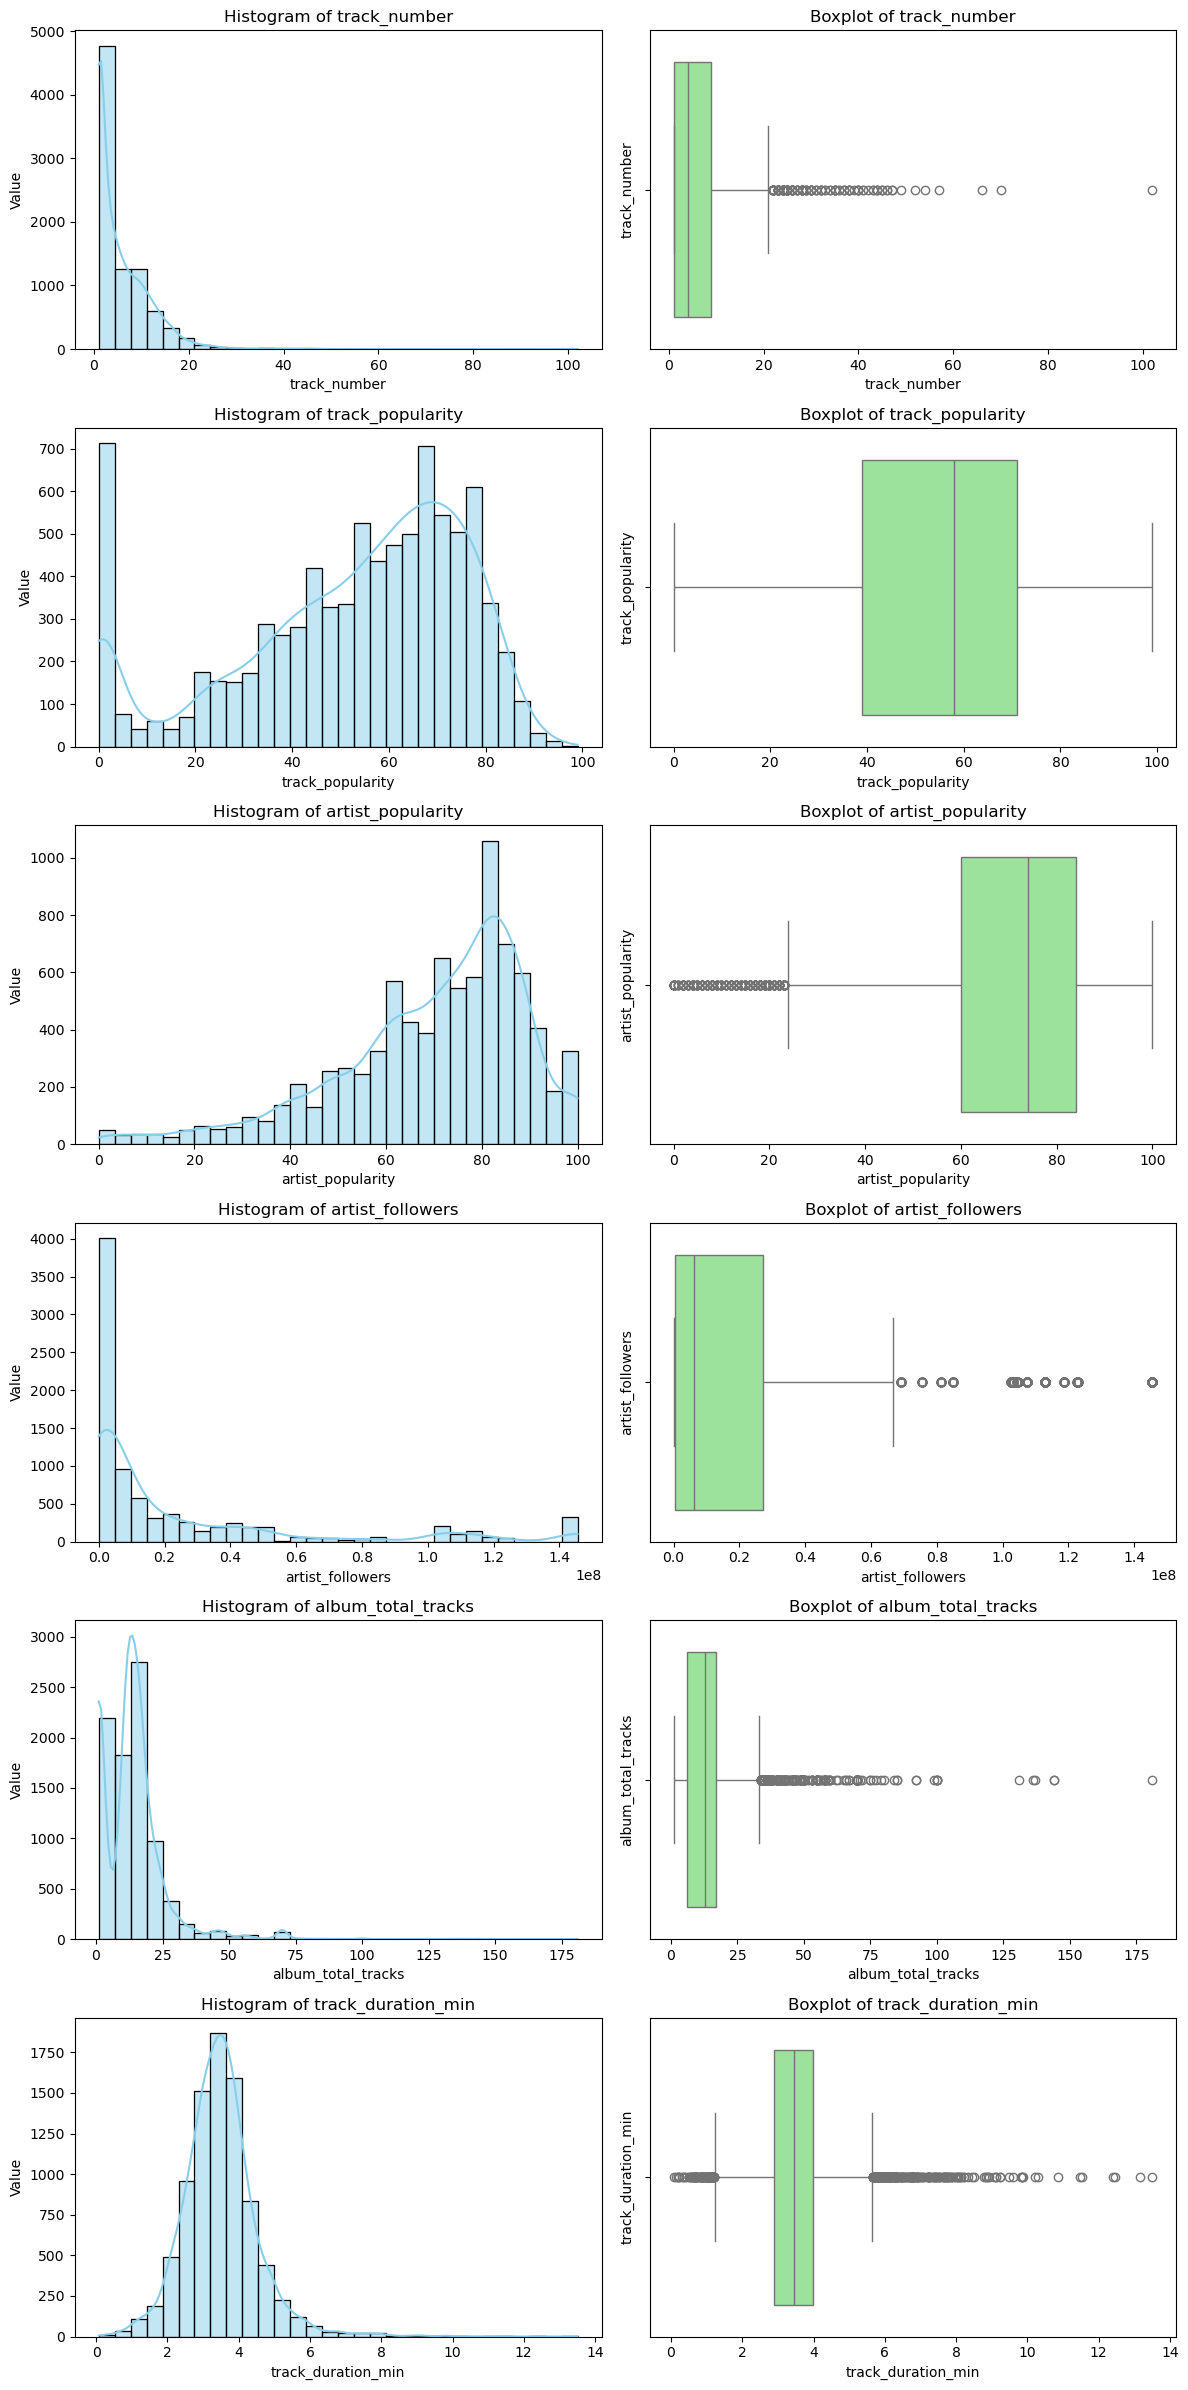

In [10]:
# Vẽ histogram và boxplot cho các cột số
n_cols = len(num_cols)
fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12,4*n_cols))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde = True, bins =30, color ='skyblue', ax = axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Value')
    
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')
    axes[i,1].set_ylabel(col)
    
plt.tight_layout()
plt.show()

Hình dáng dữ liệu
| Biến | Dạng phân phối | Đặc điểm chính |
|-----|---------------|----------------|
| `track_number` | Lệch phải (Right-skewed) | Phần lớn track nằm ở đầu album; có đuôi phải dài và nhiều outlier |
| `track_popularity` | Gần đối xứng | Giá trị tập trung quanh mức trung bình (khoảng 50–70); có một cụm nhỏ gần 0 |
| `artist_popularity` | Lệch trái (Left-skewed) | Đa số nghệ sĩ có độ phổ biến cao; ít nghệ sĩ rất ít phổ biến |
| `artist_followers` | Lệch phải rất mạnh | Nhiều nghệ sĩ có ít follower; một số ít có số follower cực lớn (outlier) |
| `album_total_tracks` | Lệch phải | Phần lớn album có số track ít; một số album rất dài tạo outlier |
| `track_duration_min` | Gần phân phối chuẩn | Phân phối dạng chuông quanh 3–4 phút; đuôi phải nhẹ (bài dài bất thường) |


 * Tính toán các giá trị: mean, median, std

In [11]:
# Tính mean, meadian, std
dist_dict = {}
for col in num_cols:
    dist_dict[col] = {
        'mean': df[col].mean(),
        'median':df[col].median(),
        'std':df[col].std()
    }

dist_df = pd.DataFrame(dist_dict).T
dist_df = dist_df.round(2)
dist_df

,mean,median,std
track_number,5.77,4.00,6.05
track_popularity,52.36,58.00,23.82
artist_popularity,69.73,74.00,19.65
artist_followers,24034719.33,6105547.00,38031804.96
album_total_tracks,13.79,13.00,11.89
track_duration_min,3.49,3.44,1.06


#### 2. Range & Outliers

 * Giá trị nhỏ nhất và lớn nhất là bao nhiêu?

In [12]:
# Tính max, min
range_dict = {}
for col in num_cols:
    range_dict[col] = {
        'min': df[col].min(),
        'max':df[col].max()
    }

range_df = pd.DataFrame(range_dict).T
pd.options.display.float_format = '{:.2f}'.format
range_df

,min,max
track_number,1.00,102.00
track_popularity,0.00,99.00
artist_popularity,0.00,100.00
artist_followers,0.00,145542136.00
album_total_tracks,1.00,181.00
track_duration_min,0.07,13.51


 * Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
→ Các giá trị min/max là hoàn toàn hợp lí

 * Xác định các giá trị ngoại lai bằng biểu đồ hộp (box plot), phương pháp IQR.

In [13]:
# Xác đinh outliers bằng phương pháp IQR
def detect_outliers(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    num_outliers = outliers.shape[0]
    return lower_bound, upper_bound, num_outliers

outlier_dict = {}
for col in num_cols:
    lower, upper, count = detect_outliers(col)
    outlier_dict[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'number_outliers': count
    }
outlier_df = pd.DataFrame(outlier_dict).T           
outlier_df

,lower_bound,upper_bound,number_outliers
track_number,-11.00,21.00,166.00
track_popularity,-9.00,119.00,0.00
artist_popularity,24.00,120.00,286.00
artist_followers,-39723026.50,67437897.50,1044.00
album_total_tracks,-10.50,33.50,379.00
track_duration_min,1.21,5.66,358.00


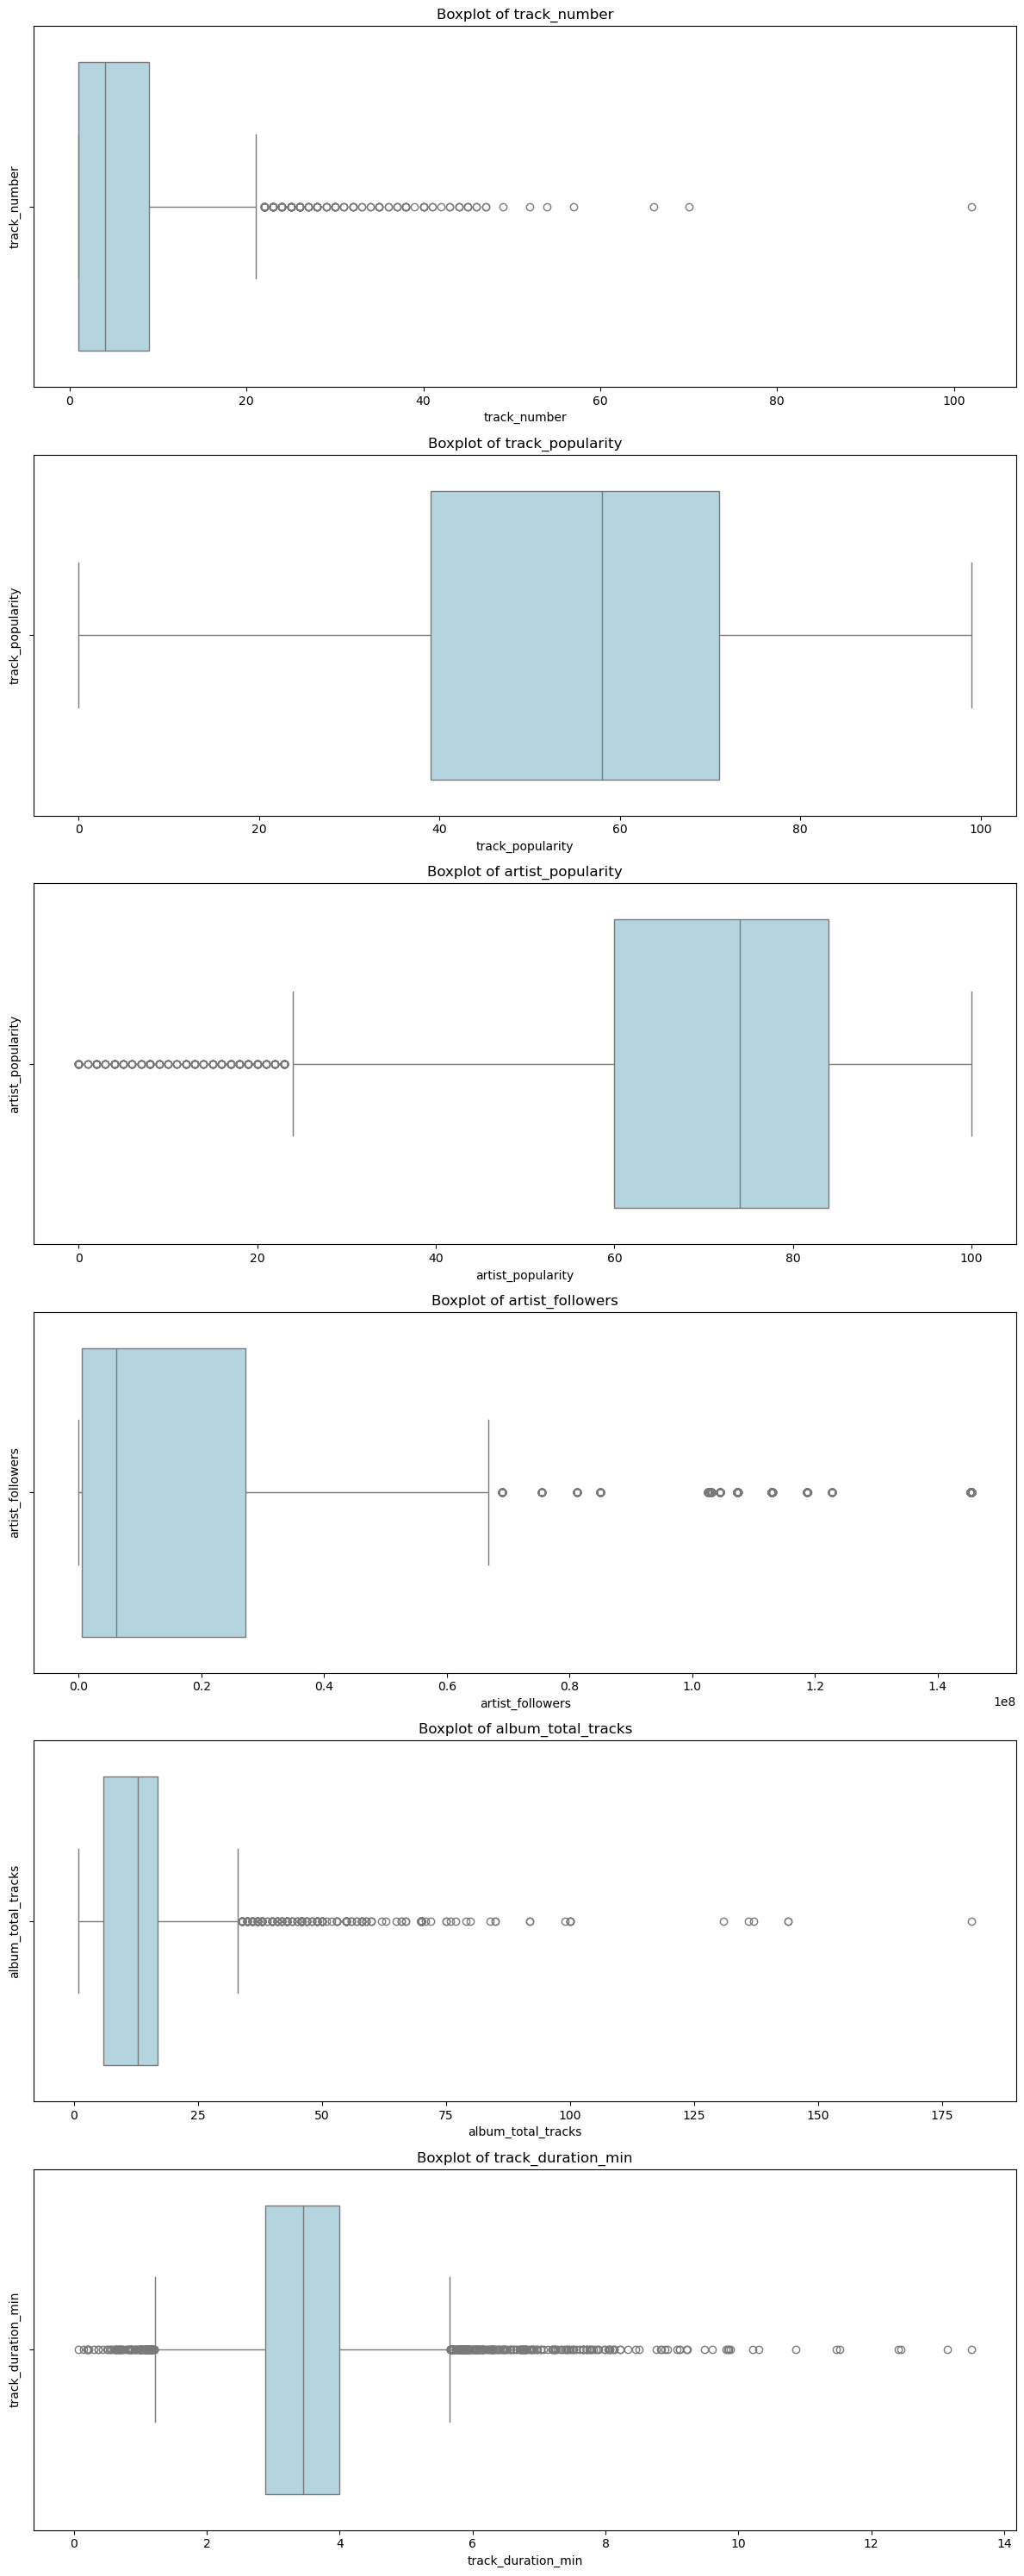

In [14]:
# Xác định outliers bằng box plot
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12,5*n_cols))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

 * Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
    * Các giá trị ngoại lai là cực trị (vì max, min hợp lí)

#### 3. Data Quality:

 * Bao nhiêu phần trăm giá trị bị thiếu?

In [15]:
# Tính tỉ lệ phần trăm giá trị bị thiếu
miss_dict = {}

for col in num_cols:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_number,0.00,0.00
track_popularity,0.00,0.00
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
album_total_tracks,0.00,0.00
track_duration_min,0.00,0.00


 * Có giá trị nào không hợp lệ không? (ví dụ: tuổi âm, giá bằng 0)

In [16]:
# Tính giá trị không hợp lệ (giá trị âm)
invalid_mask = (df[num_cols] < 0).any(axis=1)

if(df[invalid_mask].empty):
    print('Không có giá trị không hợp lệ')
else:
    print('Giá trị không hợp lệ')
    df[invalid_mask]

Không có giá trị không hợp lệ


* Có tồn tại các giá trị thay thế (placeholder) không?

In [17]:
# Tính số giá trị thay thế (-1,999,9999)
placeholders = [-1,999,9999]
placeholder_mask = df[num_cols].isin(placeholders)

placeholder_counts = placeholder_mask.sum().sum()

print("Số lượng giá trị thay thế (placeholder): ", placeholder_counts)

Số lượng giá trị thay thế (placeholder):  0


### 2.3 Phân tích Cột Phân loại (Categorical Columns)

#### 1. Phân bố giá trị (Value Distribution)

In [18]:
# Lấy các cột phân loại
cat_cols = ['explicit', 'artist_genres','album_type']

 * Có bao nhiêu giá trị khác nhau (unique/distinct)?

In [19]:
# Tính số giá trị unique
summary = []

for col in cat_cols:
    n_unique = df[col].nunique()
    top_val = df[col].mode().iloc[0]
    freq = df[col].value_counts().iloc[0]
    pct = (freq / len(df)) * 100

    summary.append({
        "Cột": col,
        "Số giá trị unique": n_unique,
        "Giá trị phổ biến nhất": top_val,
        "Tần suất": freq,
        "Tỷ lệ (%)": round(pct, 1)
    })

summary_df = pd.DataFrame(summary)
summary_df

,Cột,Số giá trị unique,Giá trị phổ biến nhất,Tần suất,Tỷ lệ (%)
0,explicit,2,False,6434,75.00
1,artist_genres,661,soundtrack,345,4.00
2,album_type,3,album,5856,68.20


 * 5–10 giá trị xuất hiện thường xuyên nhất là gì?

In [20]:
# Tính 10 giá trị phổ biến nhất
for col in cat_cols:
    print(f"\n--- Top 10 giá trị phổ biến nhất của cột '{col}' ---")
    display(
        df[col]
        .value_counts()
        .head(10)
        .reset_index()
        .rename(columns={'index': col, col: 'Tần suất'})
    )


--- Top 10 giá trị phổ biến nhất của cột 'explicit' ---


,Tần suất,count
0,False,6434
1,True,2148



--- Top 10 giá trị phổ biến nhất của cột 'artist_genres' ---


,Tần suất,count
0,soundtrack,345
1,pop,326
2,"country, pop, indie, folk",324
3,soft pop,199
4,rap,187
5,"r&b pop, alternative r&b, hip hop, synthpop",141
6,dark r&b,110
7,"alternative pop, indie pop",99
8,k-pop,92
9,"grunge, rock",91



--- Top 10 giá trị phổ biến nhất của cột 'album_type' ---


,Tần suất,count
0,album,5856
1,single,2219
2,compilation,507


 * Trực quan hóa dữ liệu: bar charts, count plots

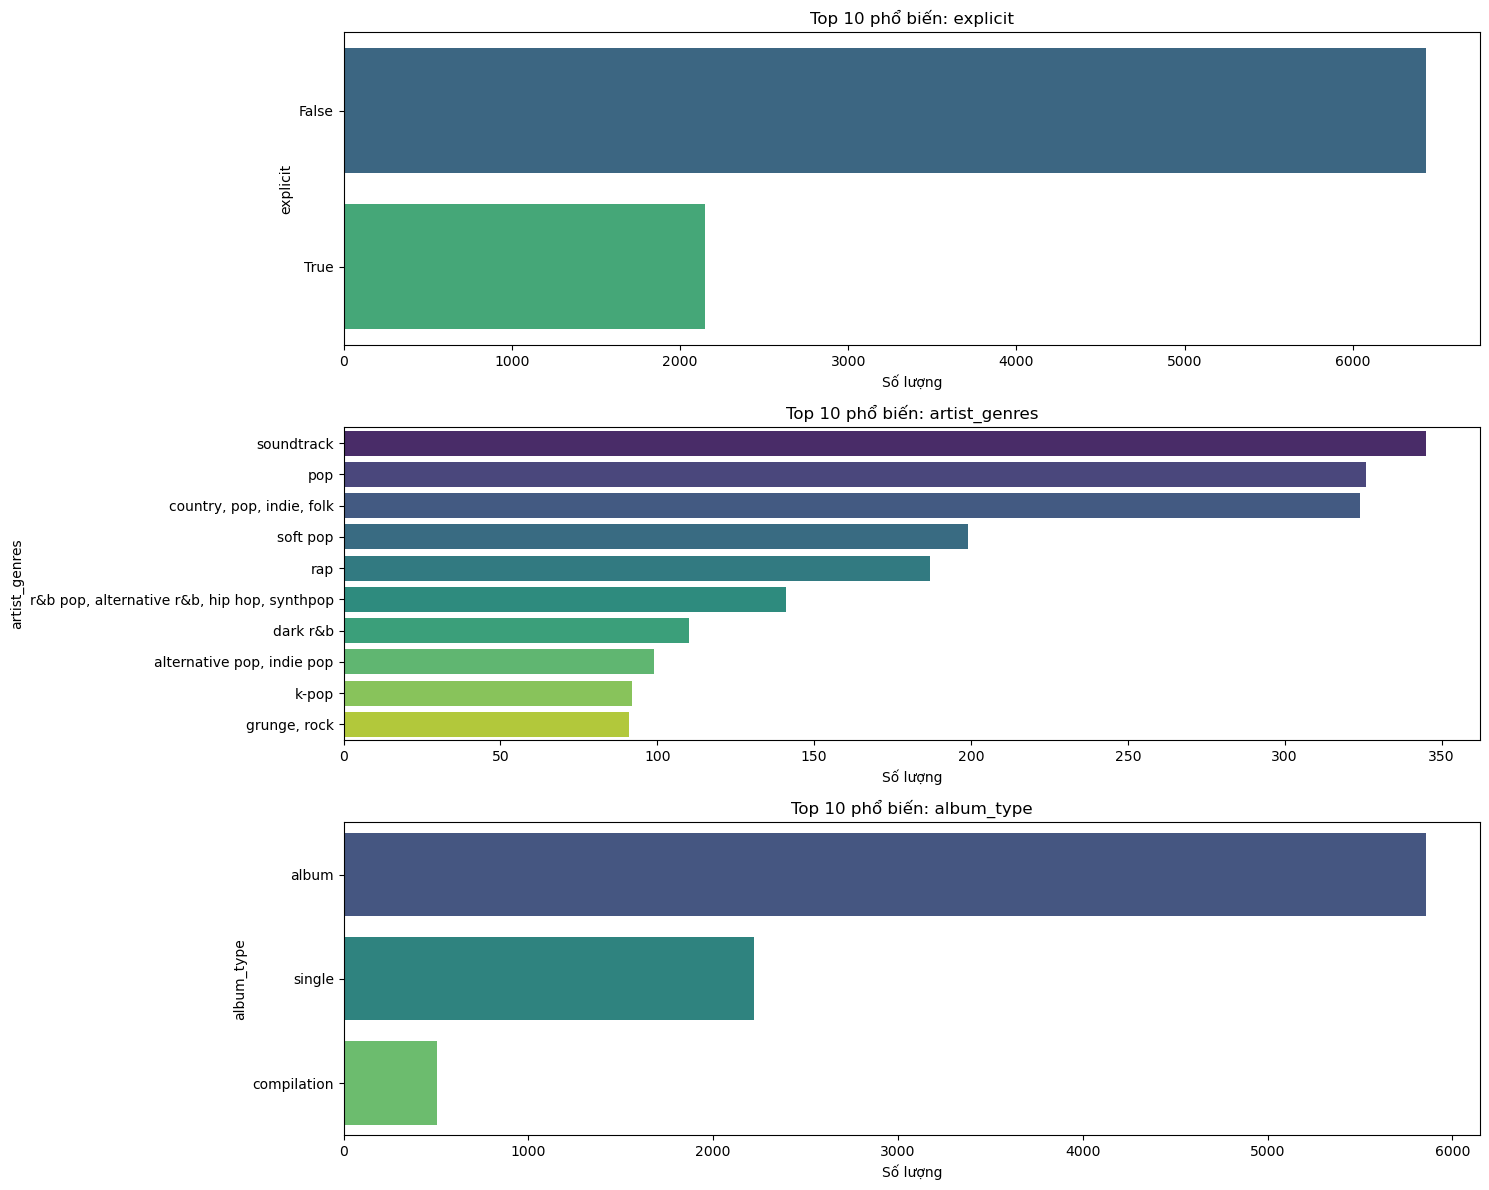

In [21]:
# Trực quan hóa dữ liệu cho 10 giá trị trên
plt.figure(figsize=(15, 4 * len(cat_cols))) 

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i) 
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(y=col, data=df, order=top_10, palette='viridis')
    
    plt.title(f'Top 10 phổ biến: {col}')
    plt.xlabel('Số lượng')

plt.tight_layout()
plt.show()

 * Phân bố dữ liệu có cân bằng hay bị mất cân bằng nghiêm trọng?
    * `explicit`: Giá trị False chiếm áp đảo so với True (Số bài hát không có nội dung nhạy cảm nhiều hơn rất nhiều)  
      → Phân phối mất cân bằng (highly imbalanced)  

    * `artist_genres`: Chỉ một số ít thể loại chiếm phần lớn dữ liệu  
      → Phân phối mất cân bằng (highly imbalanced)  
      
    * `album_type`: album chiếm đa số, single ít hơn đáng kể và compilation chiếm tỷ lệ rất nhỏ  
      → Phân phối mất cân bằng (highly imbalanced)

#### 2. Chất lượng dữ liệu 

 * Bao nhiêu phần trăm giá trị bị thiếu?
 * Có tồn tại sự không nhất quán trong các danh mục (category) không?

In [22]:

quality_data = []

for col in cat_cols:
    miss_count = df[col].isnull().sum()
    miss_pct = (miss_count / len(df)) * 100
    if df[col].dtype == 'object':
        n_orig = df[col].dropna().nunique()
        n_lower = df[col].dropna().str.lower().nunique()
        is_inconsistent = "CÓ LỖI" if n_orig != n_lower else "KHÔNG LỖI"
    else:
        is_inconsistent = "Không áp dụng"
    if col == 'artist_genres':
        def safe_parse(x):
            try:
                if pd.isna(x): return []
                if isinstance(x, str) and x.strip().startswith("["):
                    return [g.strip().lower() for g in ast.literal_eval(x)]
                return [g.strip().lower() for g in str(x).split(",")]
            except:
                return []

        all_genres = [g for sublist in df[col].apply(safe_parse) for g in sublist]
        counts = Counter(all_genres)
        rare_count = sum(1 for v in counts.values() if v <= 2)
        
    else:
        rare_count = (df[col].value_counts() <= 2).sum()
    quality_data.append([
        col, miss_count, f"{miss_pct:.1f}%", is_inconsistent, rare_count
    ])

quality_df = pd.DataFrame(
    quality_data,
    columns=['Column', 'Missing Values', '% Missing', 'Inconsistency Check', 'Rare Values (<=2)']
)

display(quality_df)

,Column,Missing Values,% Missing,Inconsistency Check,Rare Values (<=2)
0,explicit,0,0.0%,Không áp dụng,0
1,artist_genres,3361,39.2%,KHÔNG LỖI,150
2,album_type,0,0.0%,KHÔNG LỖI,0


 * Có tồn tại các giá trị bất thường hoặc không như mong đợi không?



In [23]:
# In ra các unique values trong từng cột
print("Số unique values trong các cột phân loại: ")
for col in cat_cols:
    print(f"\n{col}:")
    print(list(df[col].dropna().unique()))

Số unique values trong các cột phân loại: 

explicit:
[True, False]

artist_genres:
['moombahton', 'country hip hop, southern hip hop', 'dark r&b', 'nigerian drill, alté, afro adura, afrobeats, afrobeat, afroswing', 'c-pop', 'pop punk, emo', 'slap house', 'neo-psychedelic, indie', 'hypertechno', 'house', 'sholawat, khaleeji', 'edm', 'hipdut', 'big room', 'melodic rap', 'bedroom pop', 'k-pop', 'hypertechno, melbourne bounce', 'hard techno', 'country, pop, indie, folk', 'jazz rap', 'melodic bass, future bass', 'chicago drill', 'melodic bass, nightcore, bass music', 'future house', 'stutter house, house', 'country', 'egyptian pop, khaleeji', 'moroccan pop', 'french rap, pop urbaine, french r&b, moroccan pop', 'jersey club', 'pop', 'bongo flava', 'indie r&b', 'afrobeat', 'christian hip hop', 'pop soul', 'anime rap, anime', '3 step, gqom', 'funk de bh, funk carioca', 'alté, nigerian drill, afrobeats, afrobeat', 'melodic bass', 'afrobeats', 'soft pop', 'arrocha', 'brazilian funk, trap funk, 

→ Theo kết quả thì không tồn tại giá trị bất thường.

 * Có những danh mục có rất ít quan sát không? Có nên gộp chúng lại không?  
 → Ở cột artist_genres thì có thể thấy có tới 661 giá trị khác nhau, rất nhiều so với các cột khác và chúng ta có thể thấy thì top các thể loại có số lượng nhiều vượt trội so với các thể loại ít được nghệ sĩ dùng nên chúng ta phải gộp chúng vào một mục đó là Other để dễ dàng hơn trong việc train model sau này

In [24]:
# Gộp cột artist_genres: giữ TOP_N genre phổ biến, còn lại gộp vào cột other
TOP_N = 20

def parse_genres(x):
    if pd.isna(x) or x == "":
        return []
    try:
        if isinstance(x, str) and x.strip().startswith("["):
            return [g.strip().lower() for g in ast.literal_eval(x)]
        return [g.strip().lower() for g in x.split(",")]
    except:
        return []

# Chuẩn hóa artist_genres về dạng list
df['genres_list'] = df['artist_genres'].apply(parse_genres)

# Xác định TOP_N genre phổ biến nhất
all_genres = []
for genres in df['genres_list']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
top_genres = [g for g, _ in genre_counts.most_common(TOP_N)]

# Gom nhóm genre
def group_genres(genres):
    if not genres or genres == ['unknown']:
        return ['unknown']
    
    kept = [g for g in genres if g in top_genres]
    
    if not kept:
        return ['other']
    
    return kept

df['genres_grouped'] = df['genres_list'].apply(group_genres)

# Chuyển sang chuỗi để kiểm tra phân phối
df['genres_final'] = df['genres_grouped'].apply(lambda x: ", ".join(x))

print(df['genres_final'].value_counts().head(15))


genres_final
unknown                                        3361
other                                          1692
soundtrack                                      450
pop                                             381
country, pop, indie, folk                       324
country                                         273
soft pop                                        203
rap                                             201
alternative pop                                 160
r&b pop, alternative r&b, hip hop, synthpop     141
rock                                            114
dark r&b                                        114
edm                                             110
grunge, rock                                     93
art pop                                          88
Name: count, dtype: int64


### 2.4 Missing Data  

#### 1. Đánh giá tổng quan:

* Tạo bảng tổng hợp các giá trị thiếu: tên cột, số lượng giá trị thiếu và phần trăm giá trị thiếu.

In [25]:
# Tính tỉ lệ missing value 
miss_dict = {}

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent':missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_id,0.00,0.00
track_name,0.00,0.00
track_number,0.00,0.00
track_popularity,0.00,0.00
explicit,0.00,0.00
artist_name,3.00,0.03
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
artist_genres,3361.00,39.16
album_id,0.00,0.00


 * Trực quan hóa các mẫu dữ liệu bị thiếu (sử dụng heatmap hoặc biểu đồ cột).

Text(0.5, 1.0, 'Missing value heatmap')

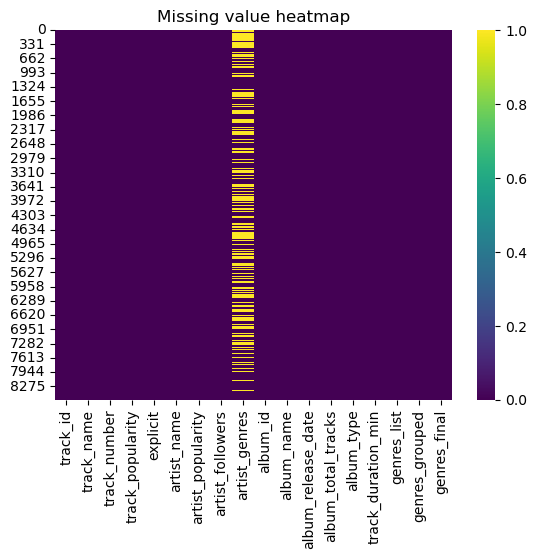

In [26]:
# Trực quan hóa
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

 * Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
  →Tập trung `artist_genres` và ngẫu nhiên tại `artist_name`

#### 2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Data collection issues: Dữ liệu thu thập từ các nguồn không trả về genre cho một số artist.
  - Not applicable: artist mới, chưa phân loại genre.
  - Random: tại cột `artist_name`
- Kế hoạch xử lý:
  - Đối với `artist_genres`: Giữ cột và điền "Unknown".
  - Đối với `artist_name`: Vì khi train model sẽ xóa cột, nên điền giá trị bằng "Unknown".

In [27]:
df.fillna("Unknown")

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,genres_list,genres_grouped,genres_final
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,[moombahton],[other],other
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,"[country hip hop, southern hip hop]",[other],other
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,Unknown,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,[],[unknown],unknown
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,[moombahton],[other],other
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,[dark r&b],[dark r&b],dark r&b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92,"[classic country, outlaw country]",[other],other
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32,"[classic country, outlaw country]",[other],other
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28,[doo-wop],[other],other
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74,"[blues, classic blues, rock and roll, rockabilly]",[other],other


### 2.5. Mối quan hệ & Tương quan (Relationships & Correlations)

 * Tính ma trận tương quan cho các biến số (numerical variables).

In [28]:
# Tính ma trận tương quan
corr_matrix = df[num_cols].corr()
print(corr_matrix)

                    track_number  track_popularity  artist_popularity  \
track_number                1.00             -0.03               0.19   
track_popularity           -0.03              1.00               0.47   
artist_popularity           0.19              0.47               1.00   
artist_followers            0.22              0.23               0.64   
album_total_tracks          0.52             -0.05               0.20   
track_duration_min          0.07              0.11               0.21   

                    artist_followers  album_total_tracks  track_duration_min  
track_number                    0.22                0.52                0.07  
track_popularity                0.23               -0.05                0.11  
artist_popularity               0.64                0.20                0.21  
artist_followers                1.00                0.18                0.17  
album_total_tracks              0.18                1.00                0.06  
track_duration

* Tạo heatmap tương quan.

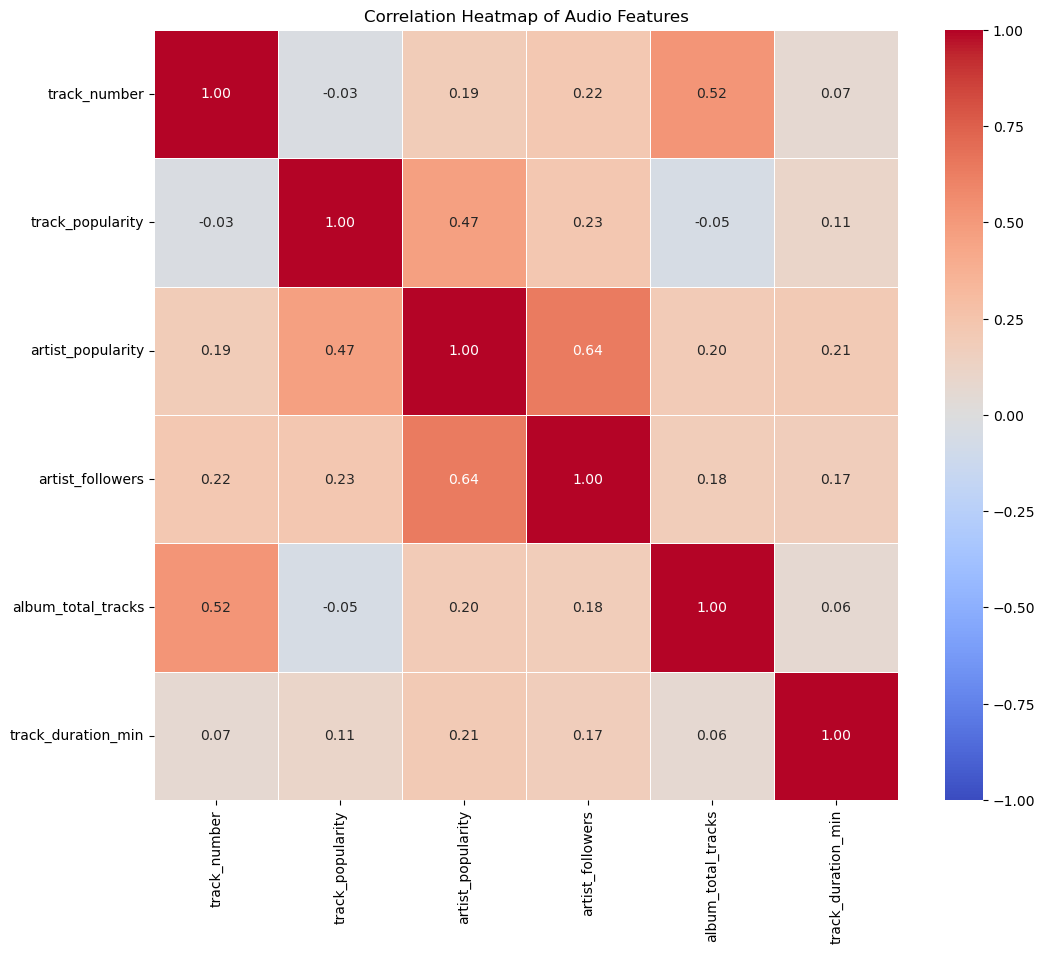

In [29]:
# Heatmap tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            linewidths=0.5, 
            vmin=-1, vmax=1)  
plt.title('Correlation Heatmap of Audio Features')
plt.show()

 * Xác định các cặp biến có tương quan mạnh (dương hoặc âm).

In [30]:
# Tìm các cặp biến có tương quan mạnh
threshold = 0.5
print("--- Các cặp biến có sự tương quan mạnh (> 0.5 hoặc < -0.5) ---")
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > threshold) & (abs(sorted_pairs) < 1.0)]

unique_pairs = []
for index, value in strong_pairs.items():
    pair = tuple(sorted(index)) 
    if pair not in unique_pairs:
        unique_pairs.append(pair)
        print(f"{index[0]} - {index[1]}: {value:.2f}")

if not unique_pairs:
    print("Không tìm thấy cặp biến nào có tương quan mạnh trên mức ngưỡng này.")

--- Các cặp biến có sự tương quan mạnh (> 0.5 hoặc < -0.5) ---
artist_popularity - artist_followers: 0.64
album_total_tracks - track_number: 0.52


 * Có mối quan hệ nào bất ngờ không?  
 → Không có mối quan hệ bất ngờ nào ở kết quả trên. Theo kết quả trên thì các mối quan hệ trên hoàn toàn tự nhiên và có thể dễ dàng suy ra được, nếu ca sĩ có nhiều người theo dõi thì độ nổi tiếng càng cao và ngược lại, điều này tương tự với album_total_tracks và track_number, nếu album có nhiều bài hát thì số thứ tự của bài hát cũng sẽ lớn.   

#### 2. Bảng chéo (Cross-tabulations)

 * Đối với các kết hợp quan trọng giữa các biến phân loại × phân loại (categorical × categorical), tạo bảng tần số.


--- Bảng chéo: Năm và Nội dung nhạy cảm (Explicit) ---


explicit,False,True
year,,
2016,256,120
2017,359,99
2018,317,205
2019,345,151
2020,318,162
2021,301,142
2022,329,139
2023,365,158
2024,446,202


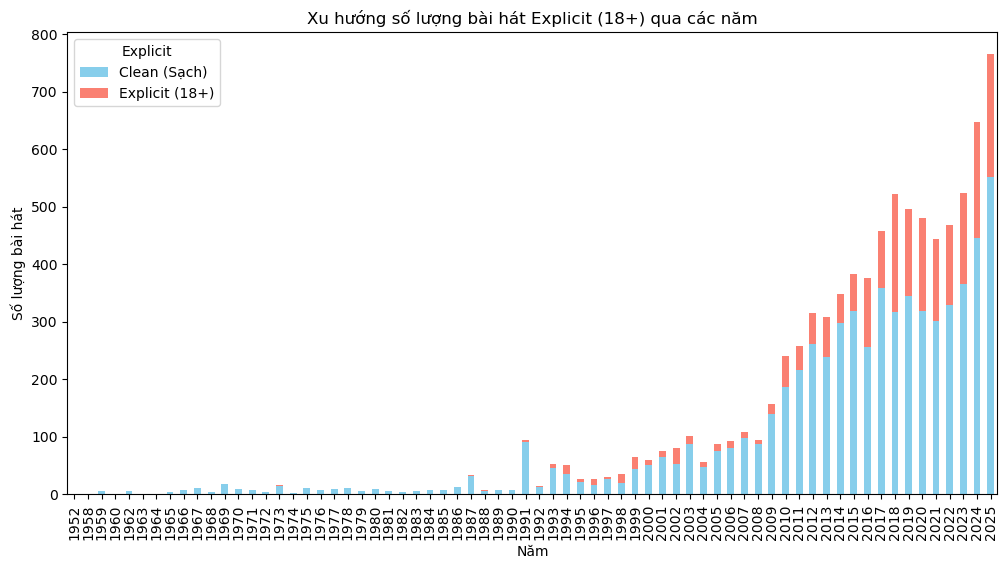

In [31]:
# Tạo bảng chéo đối với cột 
df['year'] = df['album_release_date'].dt.year

if 'year' in df.columns and 'explicit' in df.columns:
    print("\n--- Bảng chéo: Năm và Nội dung nhạy cảm (Explicit) ---")
    cross_tab_explicit = pd.crosstab(df['year'], df['explicit'])
    display(cross_tab_explicit.tail(10)) 
    cross_tab_explicit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title("Xu hướng số lượng bài hát Explicit (18+) qua các năm")
    plt.ylabel("Số lượng bài hát")
    plt.xlabel("Năm")
    plt.legend(title='Explicit', labels=['Clean (Sạch)', 'Explicit (18+)'])
    plt.show()

elif 'year' in df.columns:
    print("Không có cột 'explicit' nhưng đã có 'year'. Hãy thử phương án phân tích khác.")
else:
    print("Vẫn chưa tạo được cột 'year' do không tìm thấy dữ liệu ngày tháng gốc.")

* Đối với các kết hợp giữa biến số × biến phân loại (numerical × categorical), tạo thống kê tóm tắt theo nhóm.

Đang phân tích trên cột đã tách: temp_genre_list

--- Top 10 Thể loại (Đã tách & Lọc >= 30 bài) ---


,count,mean,std,min,25%,50%,75%,max
temp_genre_list,,,,,,,,
dark pop,61.00,73.89,10.59,17.00,70.00,74.00,80.00,94.00
electropop,61.00,73.89,10.59,17.00,70.00,74.00,80.00,94.00
trap latino,64.00,73.53,12.90,6.00,71.00,75.00,78.00,91.00
urbano latino,74.00,73.05,12.72,6.00,70.00,75.00,78.00,91.00
reggaeton,85.00,71.94,14.12,6.00,70.00,74.00,78.00,91.00
west coast hip hop,38.00,70.16,15.94,2.00,63.00,74.50,80.00,89.00
post-grunge,36.00,69.78,14.03,1.00,67.00,72.50,76.25,85.00
latin,96.00,68.72,17.13,1.00,67.00,72.00,77.00,91.00
gangster rap,33.00,68.09,9.86,41.00,62.00,70.00,77.00,82.00


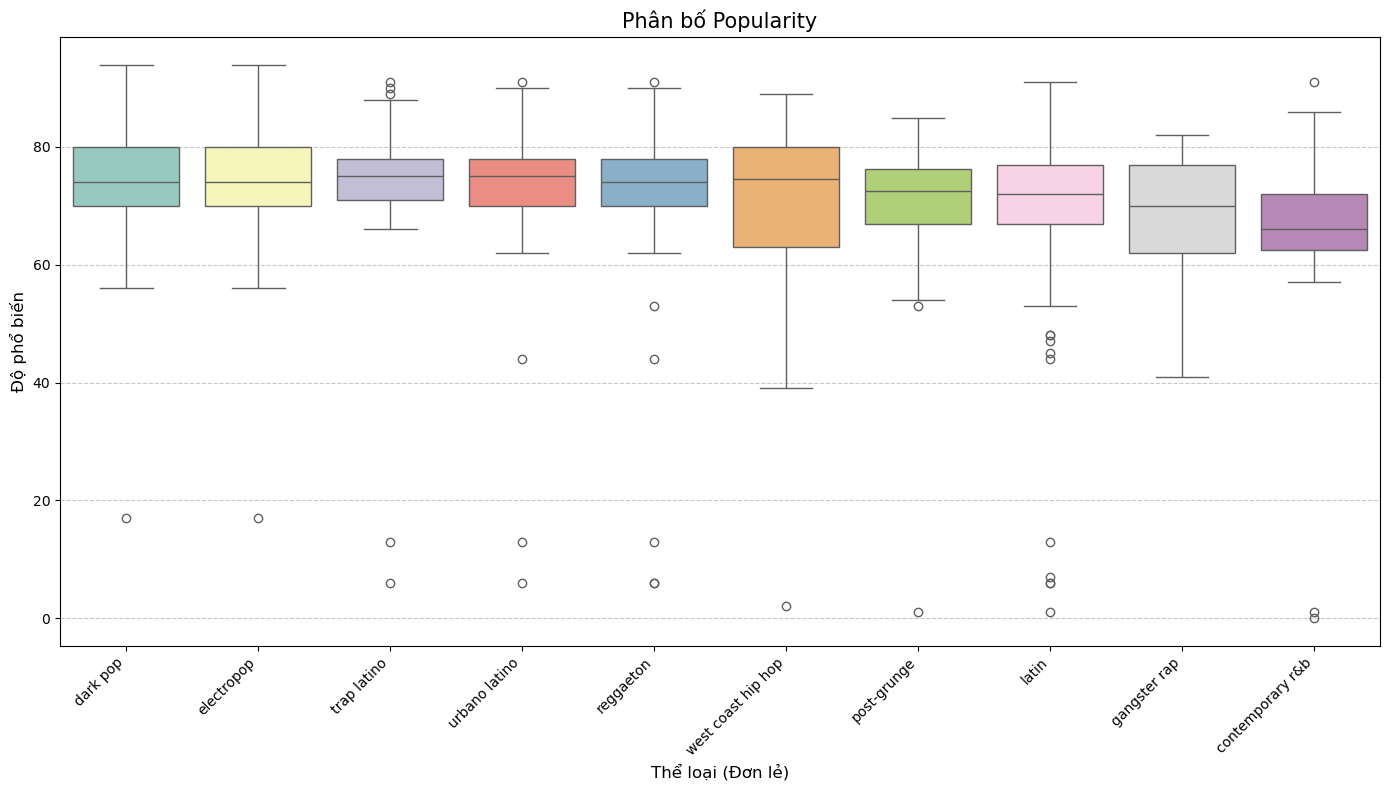

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_exploded = df.copy()
def clean_and_split(val):
    if pd.isna(val):
        return []
    val = str(val).replace('[', '').replace(']', '').replace("'", "").replace('"', '')
    return [x.strip() for x in val.split(',')]
df_exploded['temp_genre_list'] = df_exploded['artist_genres'].apply(clean_and_split)
df_exploded = df_exploded.explode('temp_genre_list')



MIN_TRACKS = 30 
target_pop_col = 'track_popularity'
target_genre_col = 'temp_genre_list' 

print(f"Đang phân tích trên cột đã tách: {target_genre_col}")

group_stats = df_exploded.groupby(target_genre_col)[target_pop_col].describe()


if '' in group_stats.index:
    group_stats = group_stats.drop('') 
    
valid_genres = group_stats[group_stats['count'] >= MIN_TRACKS]

top_rated_genres = valid_genres.sort_values(by='mean', ascending=False).head(10)

print(f"\n--- Top 10 Thể loại (Đã tách & Lọc >= {MIN_TRACKS} bài) ---")
display(top_rated_genres)


plt.figure(figsize=(14, 8))
top_genre_names = top_rated_genres.index.tolist()

df_plot = df_exploded[df_exploded[target_genre_col].isin(top_genre_names)]

sns.boxplot(
    x=target_genre_col, 
    y=target_pop_col, 
    data=df_plot, 
    order=top_genre_names, 
    palette="Set3"
)

plt.title(f'Phân bố Popularity' , fontsize=15)
plt.xlabel('Thể loại (Đơn lẻ)', fontsize=12)
plt.ylabel('Độ phổ biến', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.6. Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa thông tin hơn 8.000 bài hát, phân bố trên nhiều nghệ sĩ, album và thể loại nhạc khác nhau, tạo điều kiện phân tích đa dạng về âm nhạc và hành vi nghe nhạc.
  - Các trường dữ liệu cơ bản đều được điền đầy đủ (ngoại trừ `artist_genres` với tỉ lệ thiếu là $39$ %), bao gồm thông tin về track, artist, album, popularity, explicit → thuận lợi cho xử lý và phân tích thống kê.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Thiếu thông tin thể loại nhạc (artist_genres) → cần gán mặc định "Unknown".
  - Không có missing value ở các cột số (`track_popularity`, `artist_popularity`, `artist_followers`,`album_total_tracks`, `track_duration_min`) → thuận lợi cho phân tích định lượng.
- Các bước tiền xử lý cần thiết:
  - Điền missing value cho `artist_genres` và `artist_name` bằng "Unknown".
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Mối quan hệ giữa popularity và đặc điểm nghệ sĩ.
  - Các yếu tố ảnh hưởng đến `track_popularity`.

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - `artist_genres` bị thiếu khoảng 39% → ảnh hưởng khi phân tích theo thể loại nhạc hoặc nhóm nghệ sĩ.
  - Dữ liệu lệch trái đối với các cột `track_number`, `artist_followers`, `album_total_tracks`
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - `artist_followers` và `track_popularity` có thể thay đổi theo thời gian -> dữ liệu là snapshot tại một thời điểm, không phản ánh thay đổi thực tế.
  - Không có thông tin về quốc gia phát hành hoặc khu vực địa lý -> không thể phân tích sự khác biệt vùng miền hoặc quốc tế.

# 3. Question fomulation 

### 3.1. Câu hỏi 1

#### 1. Câu hỏi
- Research Question: Nghệ sĩ có mức độ phổ biến cao (`artist_popularity`) hoặc nhiều người theo dõi (`artist_followers`) hơn có xu hướng phát hành các bài hát có độ phổ biến (`track_popularity`) cao hơn hay không?

- Câu hỏi này có thể trả lời trực tiếp bằng dữ liệu hiện có thông qua phân tích tương quan và trực quan hóa giữa các biến liên quan.

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ liệu mức độ nổi tiếng của nghệ sĩ có ảnh hưởng trực tiếp đến độ phổ biến của bài hát hay không.

- Lợi ích / insight mang lại là gì?  
    → Kết quả cho thấy vai trò của artist_popularity và artist_followers trong việc dự đoán mức độ thành công của một bài hát.

- Ai quan tâm đến kết quả này?  
    → Các hãng thu âm, nền tảng phát nhạc trực tuyến, nhà sản xuất âm nhạc và nghệ sĩ.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ các quyết định về chiến lược quảng bá, phân bổ nguồn lực marketing và phát hiện, đầu tư vào nghệ sĩ mới.

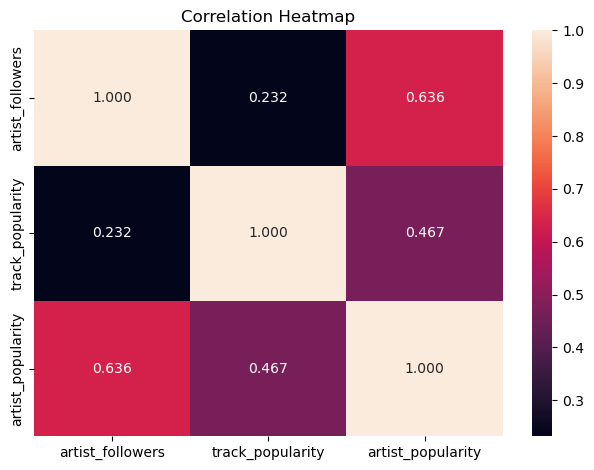

In [33]:
# Vẽ heatmap cho ma trận tương quan giữa artist_followers, track_popularity, artist_popularity

df_corr = df[['artist_followers', 'track_popularity', 'artist_popularity']].dropna()
corr_matrix = df_corr.corr()

# Vẽ heatmap  
plt.figure()
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt='.3f',        
    linewidths=0,      
    cbar=True
)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Kết luận ngắn gọn:**

- Artist popularity và Track popularity có tương quan trung bình–khá (r ≈ 0.47) → nghệ sĩ càng phổ biến thì bài hát có xu hướng phổ biến hơn.

- Artist followers và Track popularity có tương quan yếu (r ≈ 0.23) → nhiều follower không đảm bảo bài hát sẽ nổi.

- Artist followers và Artist popularity có tương quan khá mạnh (r ≈ 0.64) → hai thước đo này liên quan chặt chẽ, nhưng không tương đương khi dự đoán độ phổ biến bài hát.

→ `artist_popularity` là chỉ báo tốt hơn `artist_followers` khi dự đoán `track_popularity`

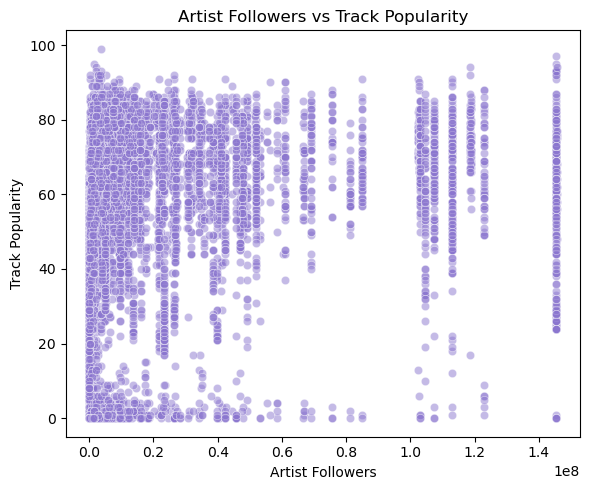

In [34]:
# Scatter 1: artist_followers vs track_popularity

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='artist_followers',
    y='track_popularity',
    alpha=0.5,
    color = "#8B76CF"
)
 
plt.title('Artist Followers vs Track Popularity')
plt.xlabel('Artist Followers')
plt.ylabel('Track Popularity')

plt.tight_layout()
plt.show()

**Kết luận về mối liên hệ artist_followers và track_popularity :**

- Không có xu hướng tuyến tính rõ ràng giữa số lượng người theo dõi và độ phổ biến bài hát.

- Nhiều nghệ sĩ có rất ít follower vẫn phát hành bài hát có track_popularity cao.

- Ngược lại, nghệ sĩ có rất nhiều follower vẫn có nhiều bài ít phổ biến hoặc không phổ biến.

- Dữ liệu phân tán mạnh, cho thấy artist_followers không phải yếu tố quyết định trực tiếp đến độ phổ biến của từng bài hát.

→ **Kết luận tổng quát:** số follower phản ánh quy mô fanbase, nhưng không dự đoán tốt mức độ thành công của một bài hát cụ thể.

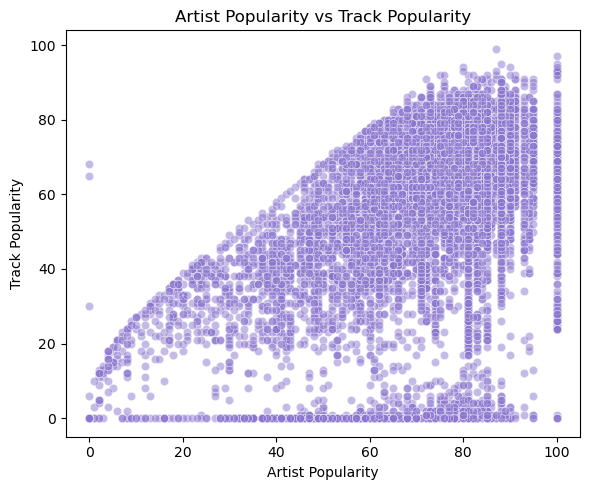

In [35]:
# Scatter 2: artist_popularity vs track_popularity
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=df,
    x='artist_popularity',
    y='track_popularity',
    alpha=0.5,
    color = "#8B76CF"
)
plt.title('Artist Popularity vs Track Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')

plt.tight_layout()
plt.show()

**Kết luận về mối liên hệ artist_popularity và track_popularity :**

- Có xu hướng tăng rõ ràng: nghệ sĩ càng phổ biến thì bài hát có khả năng đạt độ phổ biến cao hơn.

- Tuy nhiên, dữ liệu phân tán mạnh → cùng một mức artist_popularity vẫn có bài rất nổi và bài gần như không nổi.

- Nhiều điểm nằm sát track_popularity = 0 cho thấy: độ phổ biến của nghệ sĩ không đảm bảo thành công cho từng bài hát.

→ **Kết luận tổng quát:** artist_popularity là yếu tố ảnh hưởng tích cực nhưng không quyết định đến track_popularity; cần thêm các yếu tố khác (thời điểm phát hành, genre, marketing, playlist, …) để giải thích đầy đủ.

### 3.2. Câu hỏi 2

#### 1. Câu hỏi
- Research Question: Xu hướng sáng tác các thể loại âm nhạc (`artist_genres`) thay đổi như thế nào theo thời gian trên Spotify?

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ sự thay đổi trong xu hướng thể loại âm nhạc theo thời gian, phản ánh thị hiếu người nghe và sự phát triển của thị trường âm nhạc trên Spotify.

- Lợi ích / insight mang lại là gì?  
    → Cho thấy thể loại nào đang trở nên phổ biến, thể loại nào suy giảm, và cách các xu hướng âm nhạc dịch chuyển qua các giai đoạn khác nhau.

- Ai quan tâm đến kết quả này?  
    → Nền tảng phát nhạc trực tuyến, hãng thu âm, nhà sản xuất âm nhạc, nghệ sĩ và các nhà nghiên cứu văn hóa – âm nhạc.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ định hướng sáng tác, lập kế hoạch phát hành, chiến lược playlist và dự đoán xu hướng âm nhạc trong tương lai.

In [36]:
# Chuẩn bị dữ liệu theo năm & thể loại

# Loại bỏ missing year hoặc genre
df_genre_year = df[['year', 'genres_final']].dropna()

# Đếm số bài hát theo năm và genre
genre_year_count = (
    df_genre_year
    .groupby(['year', 'genres_final'])
    .size()
    .reset_index(name='track_count')
)

genre_year_count.head(20)

,year,genres_final,track_count
0,1952,country,1
1,1958,other,1
2,1959,other,5
3,1960,other,1
4,1962,other,3
5,1962,unknown,2
6,1963,other,1
7,1964,other,1
8,1965,other,3
9,1966,other,4


In [37]:
# Lấy Top genres toàn bộ để dễ quan sát xu hướng
TOP_N = 5

top_genres = (
    genre_year_count
    .groupby('genres_final')['track_count']
    .sum()
    .sort_values(ascending=False)
    .head(TOP_N)
    .index
)

genre_year_top = genre_year_count[
    genre_year_count['genres_final'].isin(top_genres)
]


In [38]:
# Pivot bảng để nhìn xu hướng theo thời gian
genre_trend_table = genre_year_top.pivot(
    index='year',
    columns='genres_final',
    values='track_count'
).fillna(0)

genre_trend_table.head()

genres_final,"country, pop, indie, folk",other,pop,soundtrack,unknown
year,,,,,
1958,0.00,1.00,0.00,0.00,0.00
1959,0.00,5.00,0.00,0.00,0.00
1960,0.00,1.00,0.00,0.00,0.00
1962,0.00,3.00,0.00,0.00,2.00
1963,0.00,1.00,0.00,0.00,0.00


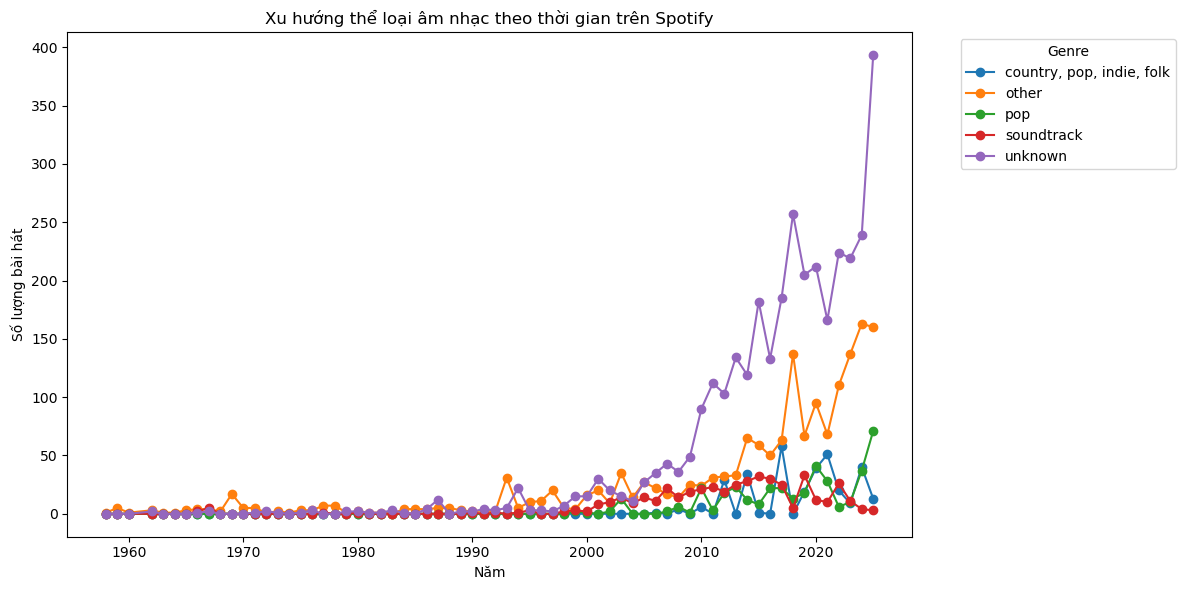

In [39]:
# Vẽ biểu đồ xu hướng theo thời gian

plt.figure(figsize=(12, 6))

for genre in genre_trend_table.columns:
    plt.plot(
        genre_trend_table.index,
        genre_trend_table[genre],
        marker='o',
        label=genre
    )

plt.title('Xu hướng thể loại âm nhạc theo thời gian trên Spotify')
plt.xlabel('Năm')
plt.ylabel('Số lượng bài hát')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Kết luận:**

- Bùng nổ số lượng: Từ sau năm 2010, số lượng bài hát trên Spotify tăng vọt theo cấp số nhân, phản ánh sự thống trị của nhạc số.

- Nhóm "Unknown" chiếm ưu thế: Thể loại không xác định (màu tím) tăng trưởng mạnh nhất và vượt xa các nhóm còn lại, cho thấy dữ liệu phân loại còn thiếu sót hoặc xuất hiện nhiều dòng nhạc mới khó định danh.

- Sự đa dạng hóa: Nhóm "Other" (màu cam) đứng thứ hai về tốc độ tăng, chứng tỏ xu hướng nghe nhạc ngày càng đa dạng, không chỉ tập trung vào các dòng nhạc truyền thống như Pop hay Country.

### 3.3. Câu hỏi 3

#### 1. Câu hỏi
- Research Question: Chiến lược phát hành nào hiệu quả hơn: Ra mắt bài hát dưới dạng 'Single' hay phát hành trong một 'Album' đầy đủ hoặc 'compilation'? Loại hình nào thường mang lại độ phổ biến (Popularity) cao hơn?

#### 2. Động cơ và lợi ích
- Vì sao câu hỏi đáng được nghiên cứu?  
    → Câu hỏi giúp làm rõ liệu hình thức phát hành (single hay album hay compilation) có ảnh hưởng đến mức độ phổ biến của bài hát trên Spotify hay không.

- Lợi ích / insight mang lại là gì?  
    → Cho thấy loại hình phát hành nào thường mang lại track_popularity cao hơn, từ đó đánh giá hiệu quả của chiến lược phát hành single so với album.
 
- Ai quan tâm đến kết quả này?  
    → Nghệ sĩ, hãng thu âm, nhà sản xuất âm nhạc và các nền tảng phát nhạc trực tuyến.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?  
    → Hỗ trợ quyết định lựa chọn chiến lược phát hành phù hợp (ra single hay album) nhằm tối đa hóa độ phổ biến và hiệu quả tiếp cận người nghe.

In [40]:
# Lấy unique value, và số lượng
print("Các loại album có trong dữ liệu:", df['album_type'].unique())

df_q1 = df[df['album_type'].isin(['album', 'single','compilation'])].copy()

print(f"Số lượng bài hát sau khi lọc: {len(df_q1)}")
print(df_q1['album_type'].value_counts())

Các loại album có trong dữ liệu: ['album' 'single' 'compilation']
Số lượng bài hát sau khi lọc: 8582
album_type
album          5856
single         2219
compilation     507
Name: count, dtype: int64


In [41]:
# Tạo bảng thống kê
stats = df_q1.groupby('album_type')['track_popularity'].agg(['mean', 'median', 'count', 'std'])
print("--- Bảng thống kê Popularity theo loại phát hành ---")
display(stats)

--- Bảng thống kê Popularity theo loại phát hành ---


,mean,median,count,std
album_type,,,,
album,55.66,61.00,5856,22.60
compilation,40.51,44.00,507,21.48
single,46.36,51.00,2219,25.39


**Kết luận:**
- Xu hướng chung: Album có độ phổ biến cao hơn Single và Compilation 
- Kết quả cho thấy một sự chênh lệch rõ ràng về độ phổ biến (popularity) giữa các bài hát nằm trong Album và các bài hát dạng Single.
    - Mean (Trung bình): Album đạt 55.66, cao hơn đáng kể so với Single là 46.36 và Compilation là 40.51. Mức chênh lệch lần lượt khoảng 9.3 điểm và 15.15 điểm.
    - Median (Trung vị): Album là 61.00, trong khi Single chỉ là 51.00 và của Compilation là 44.00. Việc Median của Album cao hơn 10 điểm cho thấy phần lớn các bản nhạc (track) trong album có xu hướng đạt điểm cao hơn, không chỉ bị kéo lên bởi các giá trị cực đại.

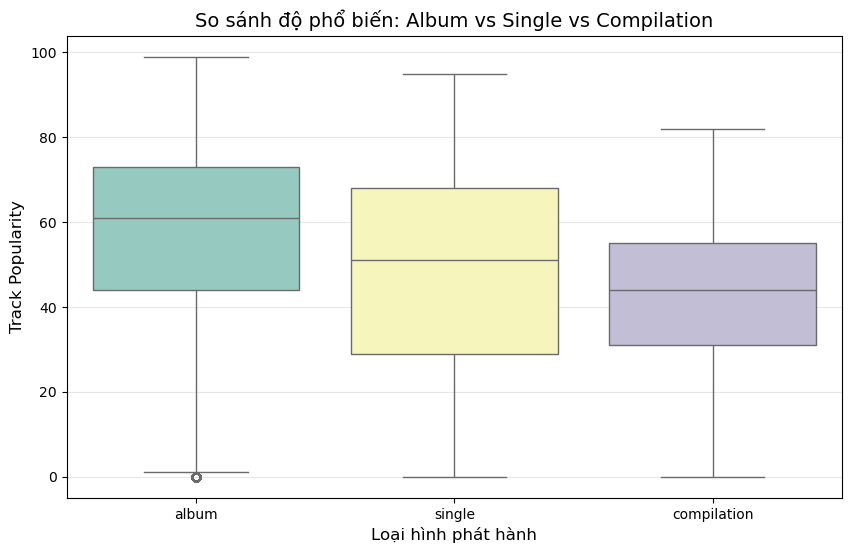

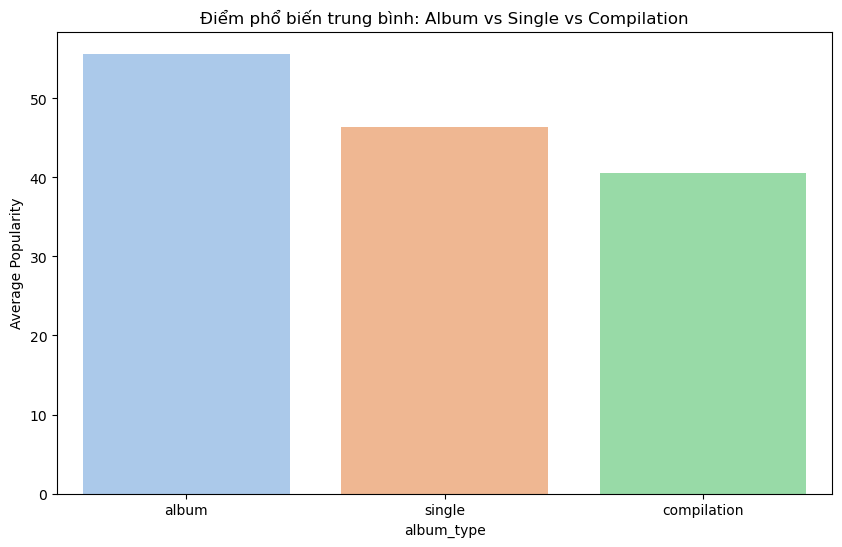

In [42]:
# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_q1, x='album_type', y='track_popularity', palette='Set3')

plt.title('So sánh độ phổ biến: Album vs Single vs Compilation', fontsize=14)
plt.xlabel('Loại hình phát hành', fontsize=12)
plt.ylabel('Track Popularity', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_q1, x='album_type', y='track_popularity', estimator=np.mean, ci=None, palette='pastel')
plt.title('Điểm phổ biến trung bình: Album vs Single vs Compilation')
plt.ylabel('Average Popularity')
plt.show()

**Kết luận:**
- Vị trí của Hộp (Box): Toàn bộ "hộp" (đại diện cho 50% dữ liệu ở giữa - IQR) của nhóm Album được dịch chuyển lên cao hơn so với nhóm Single.
- So sánh tứ phân vị: Đường Q1 (25% dữ liệu dưới cùng) của Album nằm ở mức khá cao, gần tiệm cận với mức Median của Single. Điều này có nghĩa là: khoảng 75% số lượng track trong Album có độ phổ biến cao hơn hoặc bằng mức trung bình khá của Single.  
    → Trong tập dữ liệu này, loại hình phát hành là Album mang lại độ phổ biến (Popularity) cho bài hát tốt hơn so với phát hành dạng Single và Compilation.

### 3.4. Câu hỏi 4 (Câu hỏi dùng mô hình machine learning)

#### 1. Câu hỏi
- Research Question: Dự đoán `track_popularity` bằng mô hình học máy

2. Động cơ và lợi ích

- Vì sao câu hỏi đáng được nghiên cứu?
    → Câu hỏi giúp đánh giá khả năng sử dụng dữ liệu hiện có để dự đoán độ phổ biến của bài hát, từ đó hiểu rõ các yếu tố ảnh hưởng đến thành công trên Spotify.

- Lợi ích / insight mang lại là gì?
    → Xác định mức độ hiệu quả của các đặc trưng (nghệ sĩ, bài hát, hình thức phát hành, thể loại…) trong việc dự đoán track_popularity, đồng thời đánh giá tiềm năng ứng dụng của học máy trong phân tích âm nhạc.

- Ai quan tâm đến kết quả này?
    → Nền tảng phát nhạc trực tuyến, hãng thu âm, nghệ sĩ, nhà sản xuất âm nhạc và các nhà phân tích dữ liệu.

- Vấn đề hoặc quyết định thực tế nào được hỗ trợ?
    → Hỗ trợ dự đoán sớm mức độ thành công của bài hát, tối ưu chiến lược phát hành, marketing và phân bổ nguồn lực cho các sản phẩm âm nhạc tiềm năng.

# 4. Data Analysis

## 4.1. Preprocessing

**Tổng quan quy trình (Workflow):**  
Quy trình tiền xử lý được thực hiện theo các bước sau:

1. Tạo đặc trưng mới (Feature Engineering)

2. Loại bỏ các cột không phù hợp cho mô hình (Data Reduction)

3. Chia tập dữ liệu Train / Test

4. Mã hóa các biến phân loại (Categorical Encoding)

5. Chuẩn hóa `artist_genres`

6. Biến đổi log cho các biến số bị lệch (Skewed Numeric Features)

7. Chuẩn hóa dữ liệu số (Standard Scaling)

### 4.1.1 Tạo đặc trưng mới (Feature Engineering)  
- Tạo đặc trưng mới `followers_per_pop`  
- Lý do:
    - Số lượng người theo dõi của nghệ sĩ (`artist_followers`) có ý nghĩa khác nhau tùy theo mức độ nổi tiếng (`artist_popularity`).
    - Do đó, ta tạo một đặc trưng thể hiện tỷ lệ followers trên mỗi đơn vị popularity.

In [43]:
# Tạo feature followers_per_pop
df['followers_per_pop'] = df['artist_followers'] / (df['artist_popularity'] + 1) # Cộng 1 để tránh chia 0

### 4.1.2. Loại bỏ các cột không phù hợp cho mô hình (Data Reduction)  
- Lý do loại bỏ:
    - Các cột định danh (id, name) không mang thông tin dự đoán

In [44]:
# Loại bỏ những cột không có giá trị trong model
excluded_cols = ["track_id","track_name","artist_name",
                 "album_id","album_name","album_release_date",
                 "genres_grouped","genres_final","genres_list"
                ]

df = df.drop(excluded_cols, axis =1)

### 4.1.3. Chia tập dữ liệu Train / Test  
- Lý do:  
    Tất cả các phép biến đổi học tham số (encoding, scaling, log transform)  
    → chỉ fit trên tập train

In [45]:
# Chia tập train/ test
X = df.drop('track_popularity', axis = 1)
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4.1.4. Mã hóa các biến phân loại (Categorical Encoding)

- Áp dụng cho:
    - explicit
    - album_type

- Lý do:
    - Các biến này có số lượng giá trị nhỏ và không có thứ tự.

In [46]:
# One hot encoding cho cột explicit và album_type
cat_cols = ["explicit", "album_type"]  

def one_hot_encode(train, test, column, prefix):
    train_dummies = pd.get_dummies(train[column], prefix=prefix)
    test_dummies = pd.get_dummies(test[column], prefix=prefix)

    train_dummies, test_dummies = train_dummies.align(
        test_dummies, join='left', axis=1, fill_value=0
    )

    train = pd.concat([train, train_dummies], axis=1)
    test = pd.concat([test, test_dummies], axis=1)

    train = train.drop(columns=[column])
    test = test.drop(columns=[column])
    return train, test


for col in cat_cols:
    X_train, X_test = one_hot_encode(X_train, X_test, col, prefix=col)

### 4.1.5. Xử lý dữ liệu thể loại nhạc (Genres)

**Mục tiêu:**
- Chuyển cột artist_genres (dạng text, nhiều giá trị) thành các biến số
- Giảm độ thưa (sparsity) do quá nhiều thể loại hiếm
- Đảm bảo tập train và test có cùng cấu trúc feature

**Các bước thực hiện:**
1. Tách danh sách genre  
- Mỗi nghệ sĩ có thể thuộc nhiều thể loại, được lưu dưới dạng chuỗi phân tách bởi dấu phẩy.
- Do đó, cột này được chuyển thành danh sách các genre.

In [47]:
def split_genres(x):
    if pd.isna(x):
        return []
    return [g.strip() for g in str(x).lower().split(",")]

- Giá trị "nan" được thay thế bằng NA để tránh lỗi khi xử lý.

In [48]:
X_train['genre_list'] = (
    X_train['artist_genres']
    .replace("nan", pd.NA)
    .apply(split_genres)
)

2. Giữ lại các genre phổ biến nhất  
- Để giảm nhiễu và tránh tạo quá nhiều biến giả,
chỉ giữ lại 5 thể loại phổ biến nhất trong tập train.

In [49]:
all_genres = Counter(
    [g for sub in X_train['genre_list'] for g in sub]
)

top_5_genres = {
    g for g, _ in all_genres.most_common(5)
}


3. Gom nhóm các thể loại hiếm  
- Các genre không thuộc top 5 được gộp vào nhóm "others".
- Trường hợp nghệ sĩ không có thông tin thể loại, gán nhãn "unknown".

In [50]:
def categorize(genres, top_genres):
    if len(genres) == 0:
        return ["unknown"]
    return [
        g if g in top_genres else "others"
        for g in genres
    ]

- Áp dụng cho cả tập train và test (dùng chung top_5_genres):

In [51]:
X_train['genre_final'] = X_train['genre_list'].apply(
    lambda g: categorize(g, top_5_genres)
)

X_test['genre_list'] = (
    X_test['artist_genres']
    .replace("nan", pd.NA)
    .apply(split_genres)
)

X_test['genre_final'] = X_test['genre_list'].apply(
    lambda g: categorize(g, top_5_genres)
)

4. Multi-label binarization  
- Do mỗi bài hát có thể thuộc nhiều thể loại cùng lúc,
MultiLabelBinarizer được sử dụng để chuyển các genre thành các biến nhị phân.

In [52]:
mlb = MultiLabelBinarizer()

- Fit trên tập train và transform tập test để đảm bảo nhất quán.

In [53]:
genre_train = pd.DataFrame(
    mlb.fit_transform(X_train['genre_final']),
    columns=mlb.classes_,
    index=X_train.index
).add_prefix("genres_")

genre_test = pd.DataFrame(
    mlb.transform(X_test['genre_final']),
    columns=mlb.classes_,
    index=X_test.index
).add_prefix("genres_")

5. Gộp lại vào tập dữ liệu chính và loại bỏ cột trung gian

In [54]:
X_train = pd.concat([X_train, genre_train], axis=1)
X_test  = pd.concat([X_test, genre_test], axis=1)

X_train = X_train.drop(
    columns=['genre_list', 'genre_final', 'artist_genres']
)
X_test = X_test.drop(
    columns=['genre_list', 'genre_final', 'artist_genres']
)


### 4.1.6. Biến đổi log cho các biến số bị lệch (Skewed Numeric Features)

**Mục tiêu:**
- Giảm độ lệch (skewness) của các biến số
- Hạn chế ảnh hưởng của outliers
- Giúp mô hình (đặc biệt là mô hình tuyến tính) học hiệu quả hơn

**Các bước thực hiện:**
1. Xác định các biến số cần xem xét
- Chỉ các biến số có ý nghĩa định lượng mới được xem xét cho log-transform. 

In [55]:
potential_numeric = [
    'track_number',
    'artist_popularity',
    'artist_followers',
    'album_total_tracks',
    'track_duration_min',
    'followers_per_pop'
]

- Danh sách này được lọc lại để đảm bảo các cột thực sự tồn tại trong tập train.

In [56]:
num_cols = [
    c for c in potential_numeric
    if c in X_train.columns
]

- Việc này giúp pipeline linh hoạt hơn trong trường hợp một số cột đã bị loại bỏ ở các bước trước.

2. Đánh giá độ lệch của phân phối (Skewness)  
Không phải mọi biến số đều cần log-transform.
Chỉ những biến có độ lệch lớn mới được xử lý.

In [57]:
skew_threshold = 0.75

cols_to_log = [
    col for col in num_cols
    if abs(X_train[col].skew()) > skew_threshold
]

3. Thực hiện log-transform
- Đối với các biến được chọn, áp dụng hàm log1p:
- Sau khi log-transform, tên cột được đổi bằng cách thêm hậu tố _log:

In [58]:
for col in cols_to_log:
        # Dùng np.log1p an toàn cho số 0
        X_train[col] = np.log1p(X_train[col])
        X_test[col] = np.log1p(X_test[col])
        
        # Đổi tên cột thêm đuôi _log
        X_train.rename(columns={col: f"{col}_log"}, inplace=True)
        X_test.rename(columns={col: f"{col}_log"}, inplace=True)

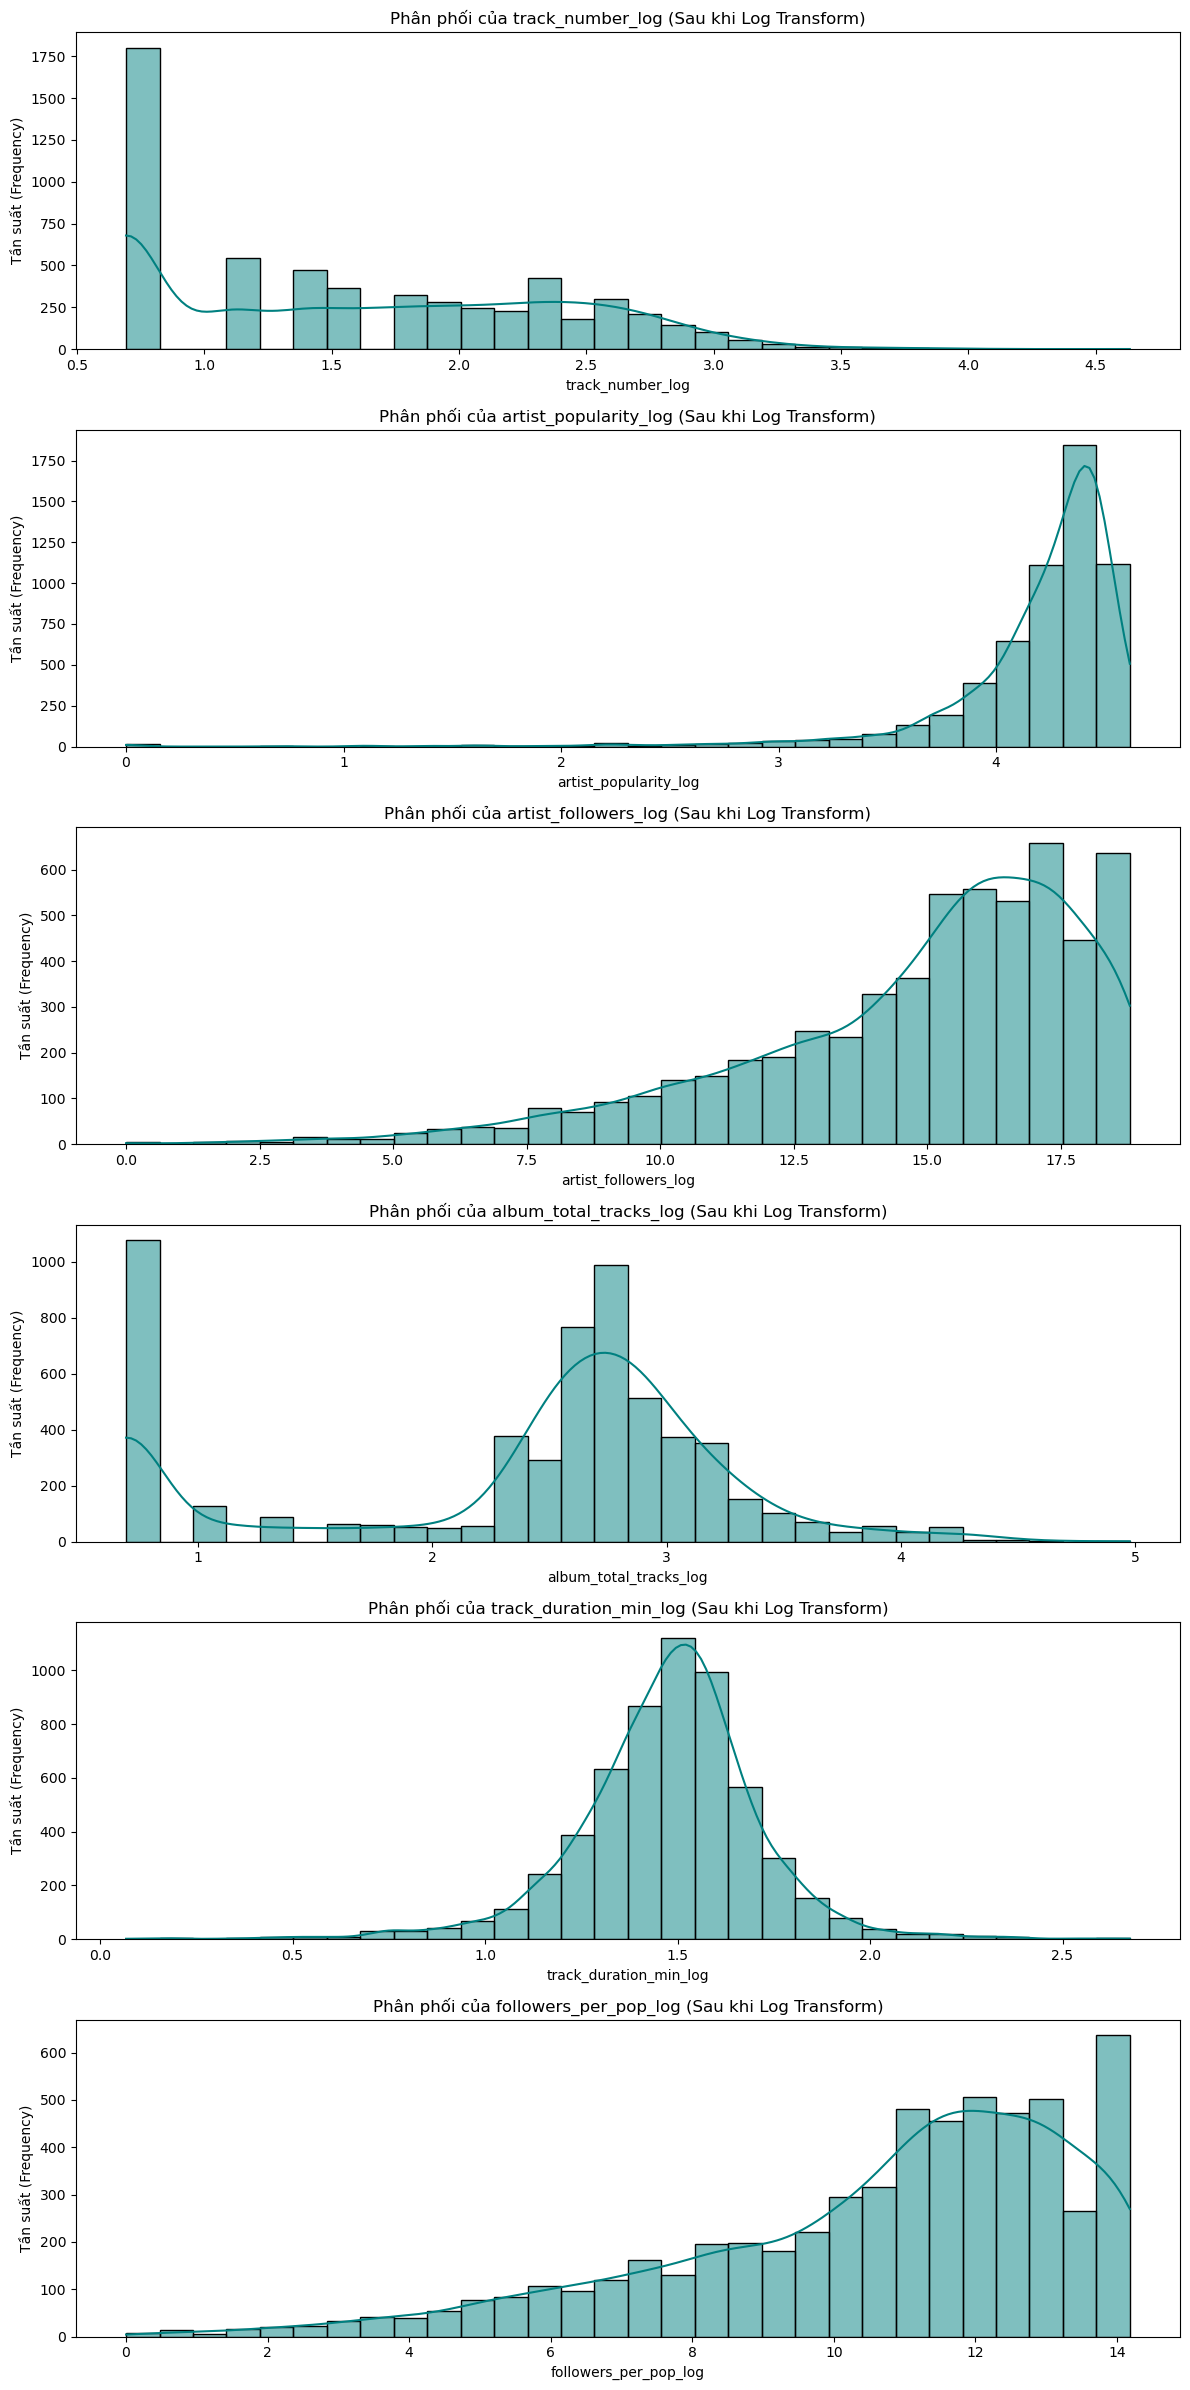

In [59]:
# 1. Xác định danh sách tên cột mới (đã thêm đuôi _log)
new_log_cols = [f"{col}_log" for col in cols_to_log]

# 2. Thiết lập kích thước biểu đồ tùy theo số lượng cột
n_cols = len(new_log_cols)
plt.figure(figsize=(12, 4 * n_cols)) 

# 3. Vẽ vòng lặp từng cột
for i, col in enumerate(new_log_cols):
    plt.subplot(n_cols, 1, i + 1)
    
    # Vẽ Histogram và đường KDE
    sns.histplot(X_train[col], kde=True, color='teal', bins=30)
    
    plt.title(f'Phân phối của {col} (Sau khi Log Transform)')
    plt.xlabel(col)
    plt.ylabel('Tần suất (Frequency)')

plt.tight_layout()
plt.show()

### 4.1.7. Chuẩn hóa dữ liệu số (Standard Scaling)
**Mục tiêu:**
- Đưa các biến số về cùng thang đo (mean = 0, std = 1)
- Tránh việc một biến có biên độ lớn chi phối mô hình
- Giúp các mô hình dựa trên khoảng cách (KNN, SVR) hoặc gradient (Linear/Logistic Regression) hội tụ nhanh và ổn định

**Các bước thực hiện:**
1. Xác định các cột cần chuẩn hóa

In [60]:
scale_cols = []
for col in num_cols:
    if col in cols_to_log:
        scale_cols.append(f"{col}_log")
    else:
        scale_cols.append(col)

- Logic: nếu biến đã log-transform → scale phiên bản _log, còn lại scale biến gốc
- Tránh scale nhầm cột không còn tồn tại (ví dụ đã drop hoặc one-hot encoding)

2. Chuẩn hóa bằng StandardScaler

In [61]:
scaler = StandardScaler()
scaler.fit(X_train[scale_cols])

StandardScaler()

- Sau đó, cùng scaler này được áp dụng cho cả train và test:

In [62]:
X_train[scale_cols] = scaler.transform(X_train[scale_cols])
X_test[scale_cols]  = scaler.transform(X_test[scale_cols])

- Lợi ích: đảm bảo dữ liệu train và test trên cùng thang đo, thuận tiện cho mô hình học máy.

3. Kiểm tra nhanh kết quả
- In 5 dòng đầu của tập train sau khi chuẩn hóa:

In [63]:
print(X_train[scale_cols].head())

      track_number_log  artist_popularity_log  artist_followers_log  \
6115              0.61                   0.52                  0.65   
5190              1.23                   0.24                  0.30   
8492              0.25                   0.49                  0.76   
4317             -1.14                  -0.12                 -0.35   
2197             -1.14                   0.33                  0.49   

      album_total_tracks_log  track_duration_min_log  followers_per_pop_log  
6115                    0.14                    0.83                   0.65  
5190                    0.45                    0.92                   0.31  
8492                    1.08                    0.20                   0.78  
4317                   -1.77                    0.76                  -0.38  
2197                   -1.77                   -0.55                   0.50  


## 4.2. Train Model

### 1. Written Explanation
#### 1.1. Mục tiêu phân tích
- Dự đoán track_popularity của một bài hát dựa trên các đặc trưng audio, thông tin album, nghệ sĩ, và thể loại.
- Xác định mô hình ML phù hợp, đánh giá hiệu quả dựa trên các metric phổ biến (RMSE, MAE, R²)

#### 1.2. Thiết lập bài toán
- Loại bài toán: Regression (dự đoán giá trị liên tục)
- Target: track_popularity (0–100)
- Features: Numeric (các thông số track, artist, album), Categorical (explicit, album_type), Multi-label genres.

#### 1.3. Quy trình phân tích

1. Chia dữ liệu: Tách thành tập train (67%) và test (33%) để đánh giá mô hình.

2. Xây dựng mô hình ML:
- Random Forest Regressor: mô hình ensemble dựa trên cây quyết định, ưu điểm:

    - Xử lý non-linear relationships tốt
    - Ít nhạy cảm với outliers và feature scaling
    - Cung cấp feature importance trực quan

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")
print(f"R²  : {r2_rf:.4f}")


Random Forest
RMSE: 19.1711
MAE : 14.0420
R²  : 0.3708


- Trực quan hóa kết quả Scatter plot: Dự đoán vs Thực tế

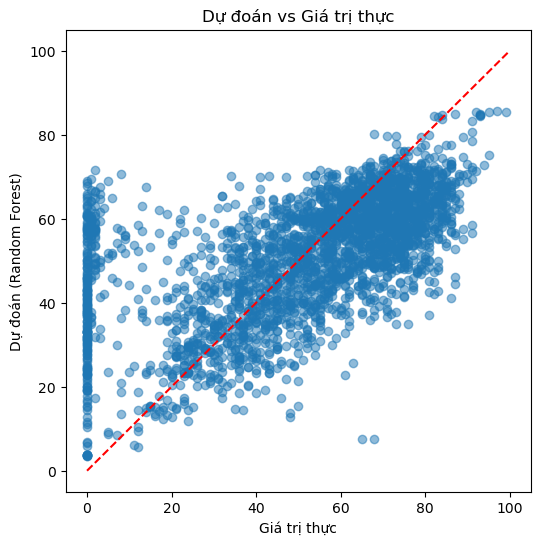

In [65]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Giá trị thực")
plt.ylabel("Dự đoán (Random Forest)")
plt.title("Dự đoán vs Giá trị thực")
plt.show()

**Nhận xét:**
- Mức độ tương quan: Các điểm dữ liệu tập trung khá sát đường nét đứt màu đỏ, cho thấy mô hình Random Forest có khả năng dự đoán tương đối tốt xu hướng chung của dữ liệu.
- Hiện tượng sai số tại giá trị thấp: Có một dải điểm dọc tại vị trí Giá trị thực = 0 nhưng dự đoán lại trải dài từ 0 đến 70. Điều này cho thấy mô hình đang bị sai số lớn (overestimate) đối với các trường hợp thực tế bằng không.
- Xu hướng dự đoán: Ở các giá trị cao (trên 80), mô hình có xu hướng dự đoán thấp hơn một chút so với giá trị thực tế (nằm dưới đường 45 độ).
- Độ phân tán: Dữ liệu có độ nhiễu (variance) nhất định, đặc biệt là ở khoảng giá trị thực từ 20 đến 60, thể hiện qua việc các điểm xanh nằm rải rác xa đường lý tưởng.

- Gradient Boosting Regressor: ensemble boosting, ưu điểm:

    - Học từng cây để giảm lỗi còn sót lại
    - Thường có hiệu quả tốt hơn trên dữ liệu phức tạp với nhiều tính năng tương tác

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr  = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr   = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"R²  : {r2_gbr:.4f}")


Gradient Boosting
RMSE: 19.3630
MAE : 14.4439
R²  : 0.3582


- Trực quan hóa kết quả bằng biểu đồ Scatter plot: Dự đoán vs Thực tế

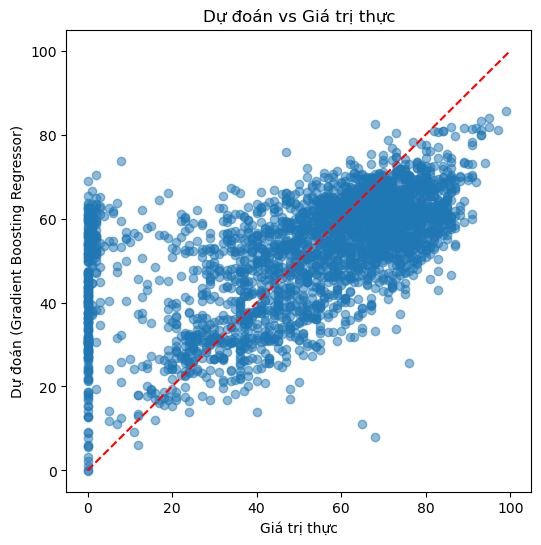

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')  
plt.xlabel("Giá trị thực")
plt.ylabel("Dự đoán (Gradient Boosting Regressor)")
plt.title("Dự đoán vs Giá trị thực")
plt.show()

**Nhận xét:**
- Mức độ tương quan: Các điểm dữ liệu tập trung khá sát đường nét đứt màu đỏ, cho thấy mô hình Random Forest có khả năng dự đoán tương đối tốt xu hướng chung của dữ liệu.
- Hiện tượng sai số tại giá trị thấp: Có một dải điểm dọc tại vị trí Giá trị thực = 0 nhưng dự đoán lại trải dài từ 0 đến 70. Điều này cho thấy mô hình đang bị sai số lớn (overestimate) đối với các trường hợp thực tế bằng không.
- Xu hướng dự đoán: Ở các giá trị cao (trên 80), mô hình có xu hướng dự đoán thấp hơn một chút so với giá trị thực tế (nằm dưới đường 45 độ).
- Độ phân tán: Dữ liệu có độ nhiễu (variance) nhất định, đặc biệt là ở khoảng giá trị thực từ 20 đến 60, thể hiện qua việc các điểm xanh nằm rải rác xa đường lý tưởng.

#### 1.4. So sánh hiệu năng mô hình
| Mô hình           | RMSE    | MAE     | R²     |
| ----------------- | ------- | ------- | ------ |
| Random Forest     | 19.1711 | 14.0420 | 0.3708 |
| Gradient Boosting | 19.3630 | 14.4439 | 0.3582 |

**Nhận xét:**
- Cả hai mô hình đều dự đoán track_popularity với độ chính xác trung bình khá.
- Random Forest có hiệu năng nhỉnh hơn:
    - RMSE và MAE thấp hơn → sai số trung bình nhỏ hơn.
    - R² cao hơn → mô hình giải thích được nhiều phương sai hơn trong dữ liệu.  

- Gradient Boosting cũng đạt kết quả tương tự nhưng hơi thấp hơn về R², có thể do learning_rate và max_depth chưa tối ưu.


#### 1.5. Diễn giải ý nghĩa của các metric
- RMSE (Root Mean Squared Error): sai số trung bình của dự đoán, nhạy với outliers.
- MAE (Mean Absolute Error): sai số tuyệt đối trung bình, dễ diễn giải hơn.
- R² score: phần phương sai dữ liệu được giải thích bởi mô hình.

#### 1.6. Những hạn chế được ghi nhận
Dựa trên kết quả dự đoán từ các mô hình Gradient Boosting và Random Forest, có các điểm yếu sau:
- Lỗi nghiêm trọng tại giá trị 0: Mô hình hoàn toàn thất bại khi dự đoán các trường hợp có giá trị thực tế bằng 0, tạo ra sai số lớn (dự đoán vọt lên mức 60-70).
- Hiện tượng Underestimation (Dự đoán thấp hơn thực tế): Tại dải giá trị cao (tiến sát mốc 100), các điểm dữ liệu nằm dưới đường đỏ, cho thấy mô hình không thể đạt tới ngưỡng giá trị tối đa của thực tế.
- Độ phân tán (Variance) cao: Các điểm dữ liệu không bám sát đường lý tưởng mà rải rác rộng, đặc biệt là ở dải 20 - 60, chứng tỏ mô hình còn nhiều nhiễu.
- Mất cân bằng hiệu suất: Mô hình dự đoán tốt nhất ở dải trung bình (nơi tập trung nhiều dữ liệu nhất) và kém chính xác dần về hai phía cực đoan.

# 5. Project Summary

### 5.1 Key Findings

Dựa trên quá trình phân tích, nhóm đã rút ra một vài insight quan trọng nhất:

* **Insight 1:**
    Dữ liệu `artist_followers` phân phối cực kỳ lệch. Chỉ 1% nghệ sĩ hàng đầu chiếm phần lớn lượng người theo dõi (lên tới 145 triệu), trong khi đa số nghệ sĩ có lượng fan rất thấp. Điều này khẳng định sự cần thiết bắt buộc của việc xử lý Log Transform trước khi đưa vào mô hình dự đoán.

* **Insight 2:**
    Việc phân loại nhạc không đơn giản là 1-1. Một bài hát thường gắn với nhiều thể loại (Multi-label). Việc chỉ giữ lại **Top 20 genres** phổ biến nhất kết hợp với nhóm **'Unknown'** và **'Other'** là chiến lược tối ưu để cân bằng giữa việc giảm chiều dữ liệu (Dimensionality Reduction) và giữ lại thông tin ngữ nghĩa.

* **Insight 3:**
    Có mối tương quan tuyến tính mạnh ($r=0.64$) giữa độ nổi tiếng của ca sĩ (`artist_popularity`) và lượng fan (`artist_followers`). Tuy nhiên, các đặc trưng kỹ thuật của bài hát (như thời lượng, số bài trong album) lại có tương quan rất yếu với độ phổ biến của bài hát (`track_popularity`).
* **Insight 4:**
    Trong tập dữ liệu này, loại hình phát hành là Album mang lại độ phổ biến (Popularity) cho bài hát tốt hơn so với phát hành dạng Single.
* **Insight 5:**
Từ sau năm 2010, số lượng bài hát trên Spotify tăng vọt theo cấp số nhân, phản ánh sự thống trị của nhạc số.Từ sau năm 2010, số lượng bài hát trên Spotify tăng vọt theo cấp số nhân, phản ánh sự thống trị của nhạc số.

 * **Insight thú vị nhất:** 
 Điều bất ngờ nhất là biến mục tiêu `track_popularity` không phụ thuộc mạnh mẽ vào bất kỳ biến đơn lẻ nào. Điều này gợi ý rằng độ hot của một bài hát là kết quả của mô hình phi tuyến tính phức tạp (Non-linear), có thể phụ thuộc vào các yếu tố ngoại cảnh (xu hướng, marketing) mà dataset này chưa bao phủ hết.

---

### 5.2 Khó khăn và thách thức 

* **Dataset Limitations:**
    * **Sampling Bias:** Dữ liệu có dấu hiệu lấy mẫu không trọn vẹn (ví dụ: `max(track_number) = 102` trong khi `max(album_total_tracks) = 181`).
    * **Missing Context:** Thiếu các dữ liệu quan trọng về hành vi người dùng (số lượt stream, skip rate) và dữ liệu âm thanh chi tiết (Audio Features như tempo, key).

* **Analysis Limitations:**
    * Phương pháp gộp nhóm Genre vào 'Other' dù giúp giảm chiều dữ liệu nhưng làm mất đi tính đặc thù của các dòng nhạc ngách (Niche genres).
* **Solution:** Nhóm đã viết hàm xử lý chuỗi tùy chỉnh (Custom Parser) và thử nghiệm nhiều ngưỡng (Threshold) khác nhau cho việc gộp nhóm 'Other' để tìm ra tỷ lệ cân bằng nhất.
---

### 5.3 Hướng đi trong tương lai

Nếu có thêm thời gian, dự án sẽ được mở rộng theo hướng:

* **Deeper Analysis:**
    * Sử dụng **NLP (Natural Language Processing)** để phân tích tên bài hát và lời bài hát (Lyrics Analysis) để tìm ra mối liên hệ giữa cảm xúc ngôn từ và độ phổ biến.
    * Áp dụng **Clustering (K-Means)** để gom nhóm Genre tự động dựa trên sự tương đồng thay vì tần suất xuất hiện.

* **Advanced Modeling:**
    * Thử nghiệm các mô hình Ensemble (XGBoost) để bắt được các mối quan hệ phi tuyến tính mà mô hình hiện tại có thể bỏ sót.


### 5.4. Ý kiến cá nhân
* Lê Hoàng Mỹ Hạ:
    * Nắm vững quy trình phân tích dữ liệu từ tiền xử lý, khám phá dữ liệu (EDA), tạo đặc trưng (feature engineering) đến xây dựng và đánh giá mô hình dự đoán.
    * Hiểu được vai trò của feature engineering trong việc cải thiện hiệu quả mô hình, đặc biệt là các đặc trưng phản ánh mức độ phổ biến và hành vi người dùng.
    * Nhận thức rõ hơn về bản chất dữ liệu thực tế: dữ liệu có nhiễu, mối quan hệ giữa các biến không hoàn toàn tuyến tính, và kết quả mô hình cần được diễn giải trong bối cảnh domain âm nhạc.

* Nguyễn Mạnh Thắng:
    * Hiểu được sự chênh lệch trong dữ liệu và dùng các kỹ thuật Toán học như Scaling hay Log Transformation để mô hình hóa sự chênh lệch đó dễ dàng hơn.
    * Học được cách xử lý dữ liệu phân loại đa nhãn (Multi-label categorical data) bằng chiến thuật Top-N Frequency, giúp giảm chiều dữ liệu hiệu quả.